<h1 style = "text-align:center; font-size:300%; color:#c91d42">Cars Price Pridection</h1>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='ggplot')
%matplotlib inline

# Loading Training  Data

In [2]:
data = pd.read_csv('/kaggle/input/used-cars-price-prediction/train-data.csv')

In [3]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Data Cleaning

### Dropping Unnecessary Columns

In [5]:
# Drop Unnecessary columns 
data.drop(['Unnamed: 0'],axis=1, inplace=True)

### Dropping Missing Values

In [6]:
# Check Missing Values
round(data.isnull().mean() * 100, 2)

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [7]:
# Dropping Missing Values
data.dropna(subset = ['Mileage', 'Power', 'Mileage', 'Seats'], inplace=True)
data.drop(['New_Price'],axis=1, inplace=True)

**We drop the missing values of Mileage, Engine, Power, and Seats because they are less than 1% of the total data.**

**We drop the column of New_Price because the missing values from it are more than 86% of the total data.**

In [8]:
# Check Missing Values agine
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
# Check 'null km/kg' Values
data[data['Mileage'] == 'null km/kg']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [10]:
# Check 'null kmpl' Values
data[data['Mileage'] == 'null kmpl']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [11]:
# Check 'null CC' Values
data[data['Engine'] == 'null CC']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [12]:
# Check 'null bhp' Values
data[data['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,1.85
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


In [13]:
# Replace 'null bhp' with the mean of Power
data['Power'] = data['Power'].str.replace('null bhp', '113')   # 113 is a median of Power feature

### Removing the non-numeric characters from features values

In [14]:
# Remove the non-numeric characters and convert to float64
data['Mileage'] = data['Mileage'].str.replace('[^\d\.]', '').astype('float64')
data['Engine'] = data['Engine'].str.replace('[^\d\.]', '').astype('float64')
data['Power'] = data['Power'].str.replace('[^\d\.]', '').astype('float64')

### Removing Duplicate Values

In [15]:
# Check Duplicate Values
data.duplicated().sum()

0

### Detecting and Removing Outliers

0 Kilometers_Driven
1 Mileage
2 Power
3 Engine


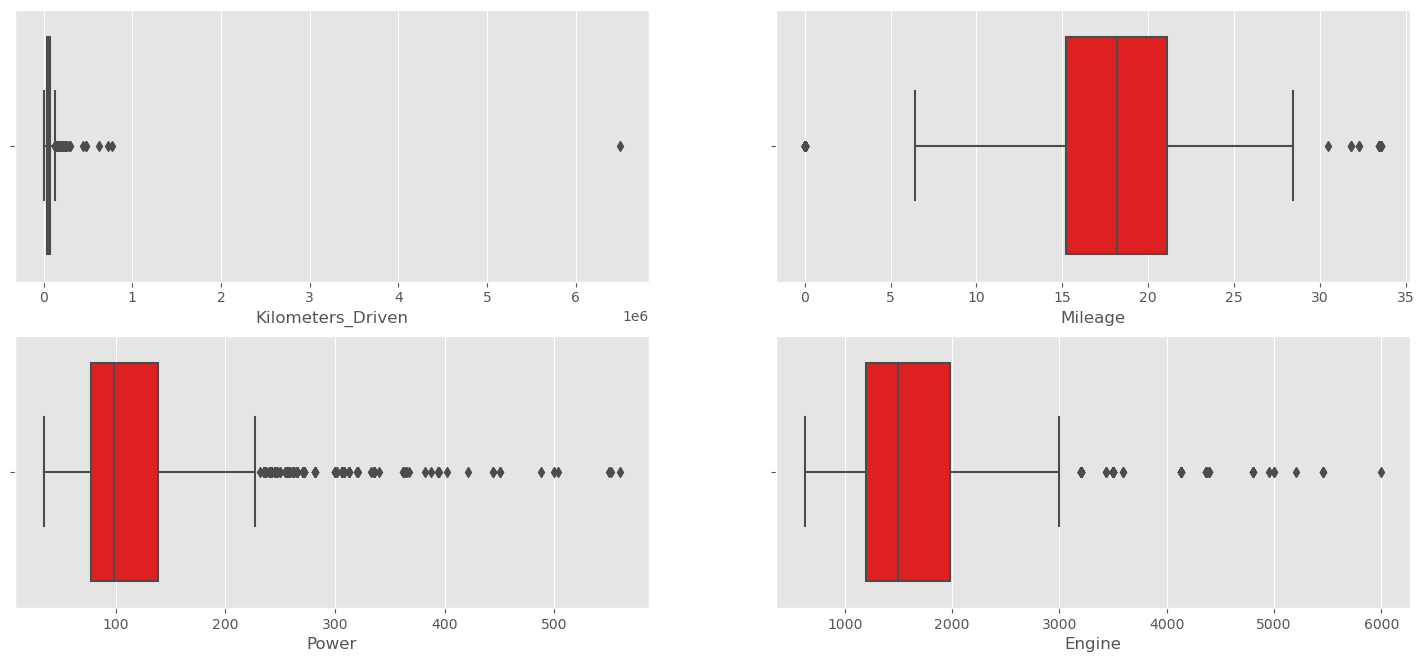

In [16]:
col = ['Kilometers_Driven', 'Mileage', 'Power', 'Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(data = data, x = v, color = 'red')
plt.show()

In [17]:
# Remove outliers for Kilometers_Driven
data.drop(data[data['Kilometers_Driven'] > 100000].index, axis = 0, inplace = True)

In [18]:
# Remove outliers for Power
data.drop(data[data['Power'] > 480].index, axis = 0, inplace = True)

In [19]:
# Remove outliers for Engine
data.drop(data[data['Engine'] > 5000].index, axis = 0, inplace = True)

0 Kilometers_Driven
1 Mileage
2 Power
3 Engine


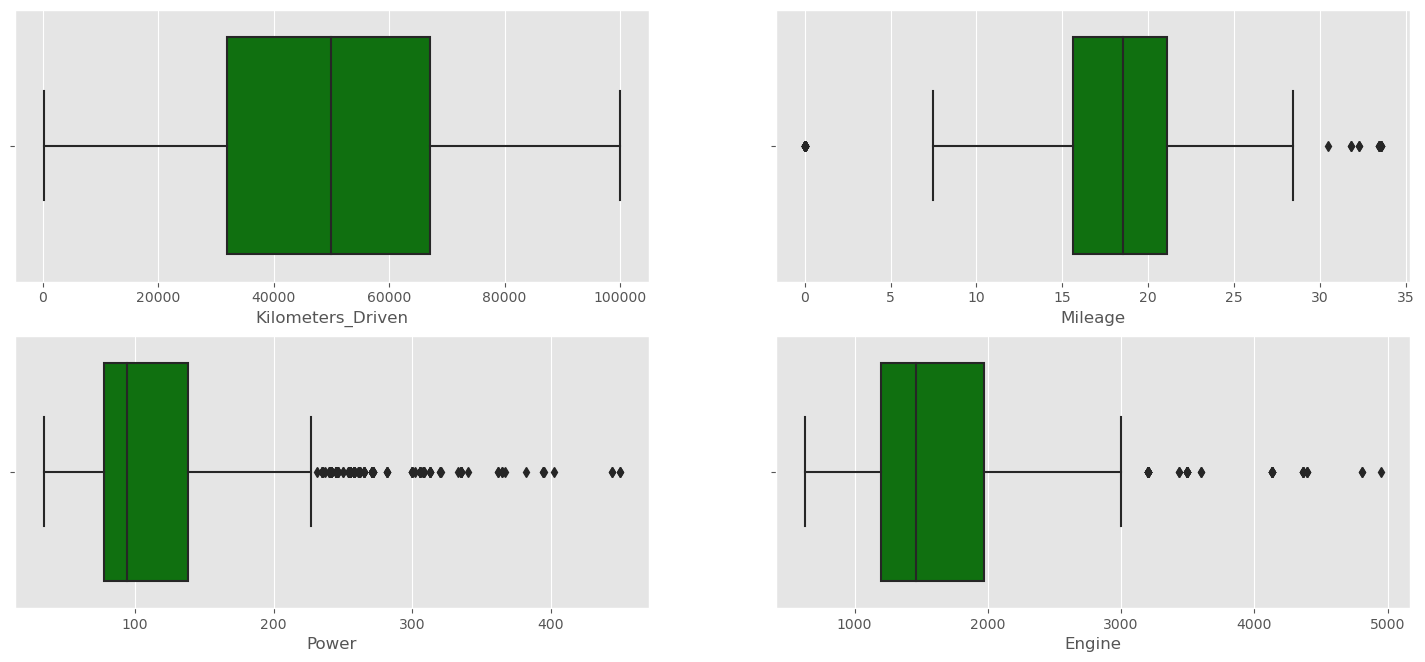

In [20]:
col = ['Kilometers_Driven', 'Mileage', 'Power', 'Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(data = data, x = v, color = 'green')
plt.show()

In [21]:
# change float format
pd.options.display.float_format = '{:,.0f}'.format

In [22]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,"5,463","5,463","5,463","5,463","5,463","5,463","5,463"
mean,"2,014","50,032",18,"1,591",113,5,10
std,3,"23,292",4,574,52,1,11
min,"1,998",171,0,624,34,2,0
25%,"2,012","32,000",16,"1,197",78,5,4
50%,"2,014","50,000",18,"1,461",94,5,6
75%,"2,016","67,000",21,"1,968",138,5,10
max,"2,019","100,000",34,"4,951",450,10,160


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5463 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5463 non-null   object 
 1   Location           5463 non-null   object 
 2   Year               5463 non-null   int64  
 3   Kilometers_Driven  5463 non-null   int64  
 4   Fuel_Type          5463 non-null   object 
 5   Transmission       5463 non-null   object 
 6   Owner_Type         5463 non-null   object 
 7   Mileage            5463 non-null   float64
 8   Engine             5463 non-null   float64
 9   Power              5463 non-null   float64
 10  Seats              5463 non-null   float64
 11  Price              5463 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 554.8+ KB


# Feature Engineering

In [24]:
# Check Name column uniques 
data['Name'].nunique()

1743

In [25]:
print(f"Percentage of uniques { round(data['Name'].nunique() / data.shape[0] * 100)} %")

Percentage of uniques 32 %


**The "Name" feature has no effect that's because it has so many unique values, So let's make it useful and impactful.**

In [26]:
data['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5463, dtype: object

**We can notice that the first word of the name is (Brand), so let's get it**

In [27]:
data['Brand'] = data['Name'].apply(lambda row: row.split()[0])

In [28]:
data['Brand'].nunique()

28

In [29]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Renault', 'Mercedes-Benz', 'BMW',
       'Mahindra', 'Ford', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet',
       'Skoda', 'Mini', 'Mitsubishi', 'Fiat', 'Jeep', 'Porsche',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force'], dtype=object)

**Now we don't need the 'Name ' column, So let's drop it.**

In [30]:
# Drop Name column
data.drop(['Name'], axis=1, inplace=True)

In [31]:
# change the position of columns
data = data.reindex(columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 
                             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'])

# Exploratory Data Analysis (EDA)

In [32]:
data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,Mumbai,CNG,Manual,First,Maruti,2010,72000,27,998,58,5,2
1,Pune,Diesel,Manual,First,Hyundai,2015,41000,20,"1,582",126,5,12
2,Chennai,Petrol,Manual,First,Honda,2011,46000,18,"1,199",89,5,4
3,Chennai,Diesel,Manual,First,Maruti,2012,87000,21,"1,248",89,7,6
4,Coimbatore,Diesel,Automatic,Second,Audi,2013,40670,15,"1,968",141,5,18


## 1. Univariate Analysis

### Year

In [33]:
data['Year'].min()

1998

In [34]:
data['Year'].max()

2019

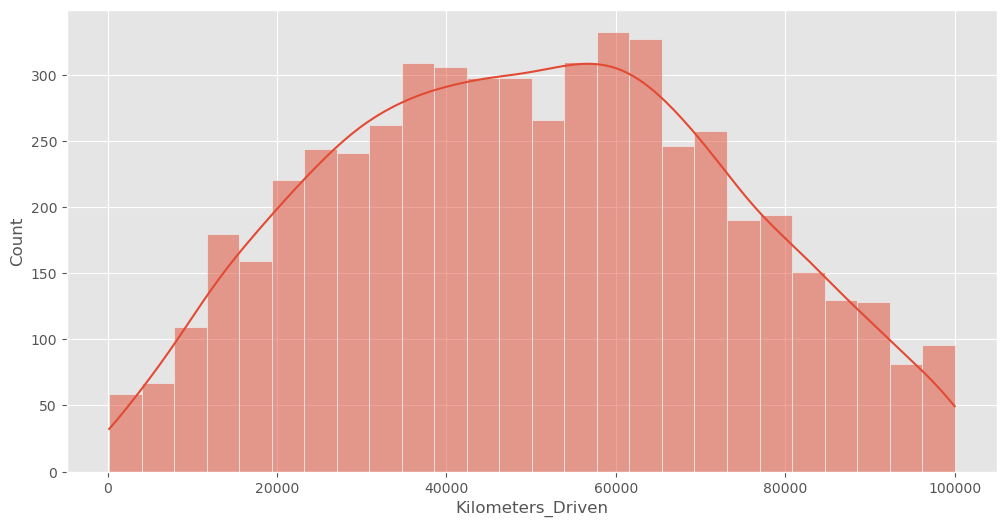

In [35]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Kilometers_Driven'], kde = True)
plt.show()

### Mileage

In [36]:
data['Mileage'].describe()

count   5,463
mean       18
std         4
min         0
25%        16
50%        18
75%        21
max        34
Name: Mileage, dtype: float64

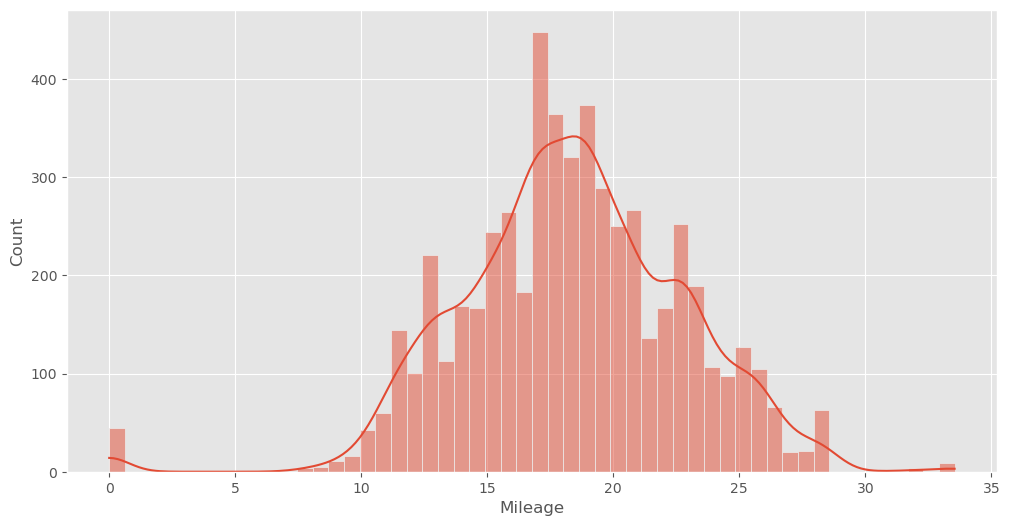

In [37]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Mileage'], kde = True)
plt.show()

### Engine

In [38]:
data['Engine'].describe()

count   5,463
mean    1,591
std       574
min       624
25%     1,197
50%     1,461
75%     1,968
max     4,951
Name: Engine, dtype: float64

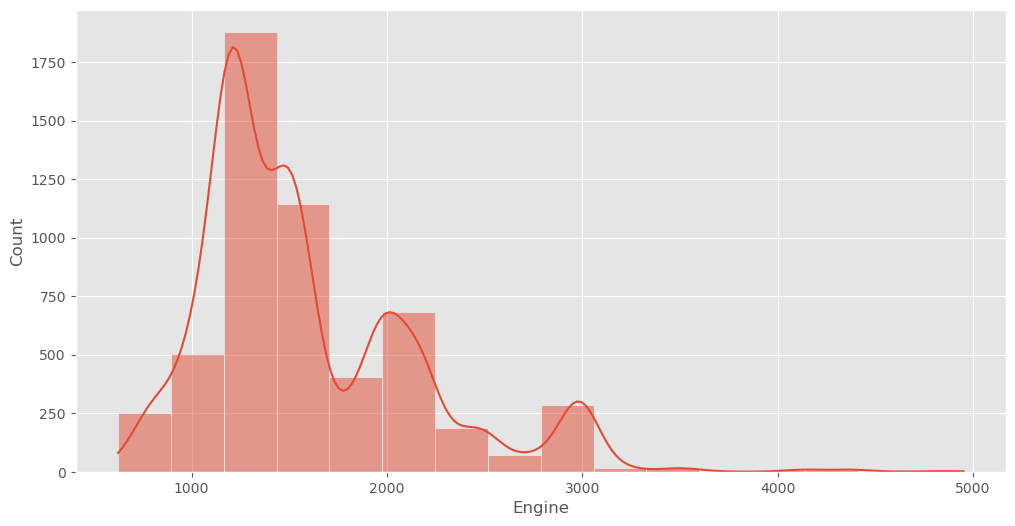

In [39]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Engine'], bins = 16, kde = True)
plt.show()

### Power

In [40]:
data['Power'].describe()

count   5,463
mean      113
std        52
min        34
25%        78
50%        94
75%       138
max       450
Name: Power, dtype: float64

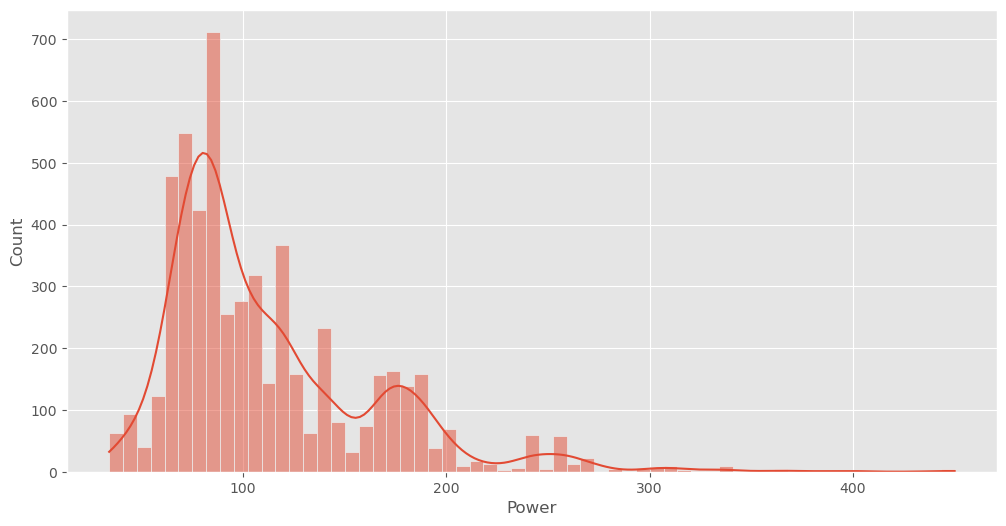

In [41]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Power'], kde = True)
plt.show()

### Price

In [42]:
data['Price'].describe()

count   5,463
mean       10
std        11
min         0
25%         4
50%         6
75%        10
max       160
Name: Price, dtype: float64

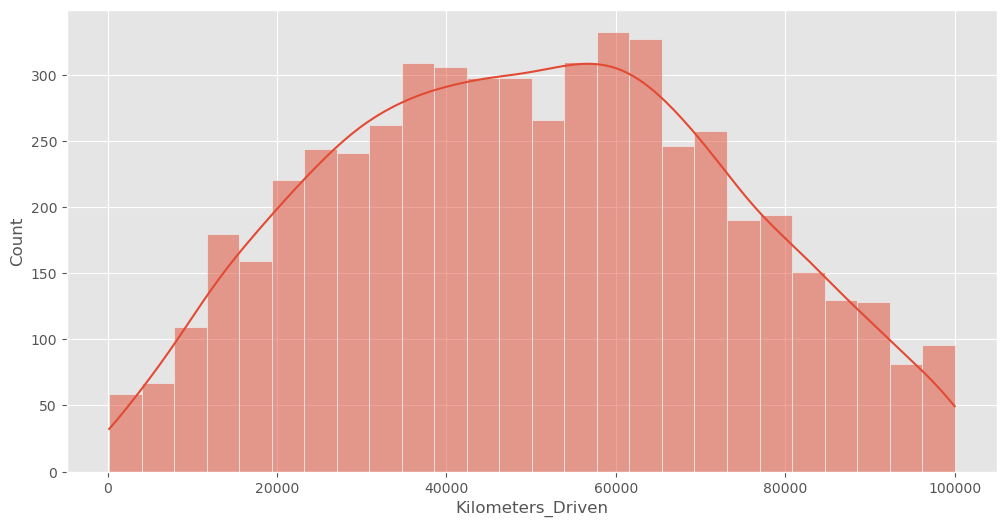

In [43]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Kilometers_Driven'], kde = True)
plt.show()

### Location

In [44]:
data['Location'].value_counts().sort_values(ascending = False)

Mumbai        752
Kochi         637
Hyderabad     620
Coimbatore    619
Delhi         529
Kolkata       511
Pune          508
Chennai       387
Jaipur        346
Bangalore     335
Ahmedabad     219
Name: Location, dtype: int64

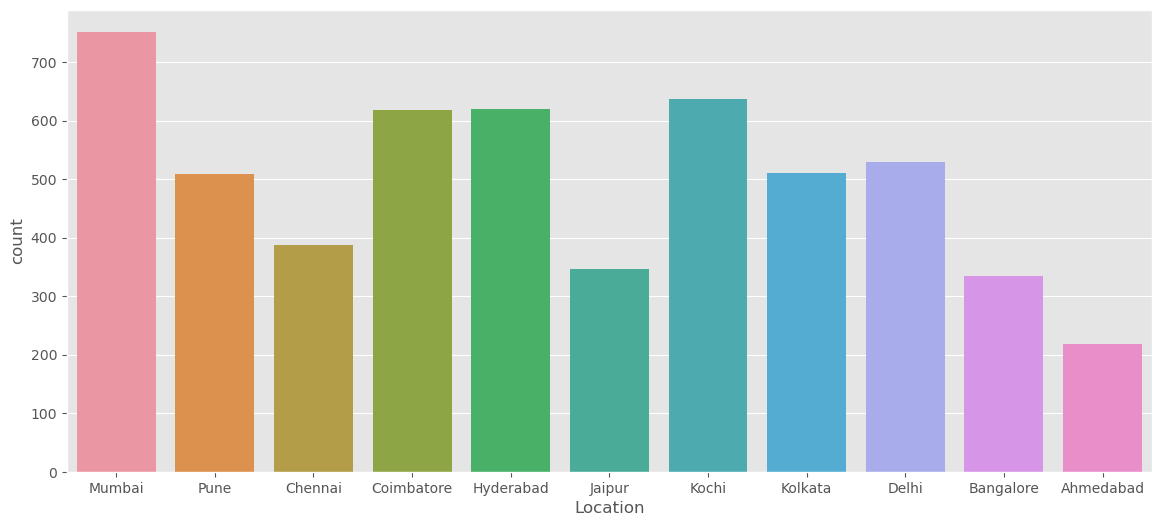

In [45]:
plt.figure(figsize = (14 ,6))
sns.countplot(data = data, x = 'Location')
plt.show()

### Owner Type

In [46]:
data['Owner_Type'].value_counts().sort_values(ascending = False)

First             4574
Second             806
Third               78
Fourth & Above       5
Name: Owner_Type, dtype: int64

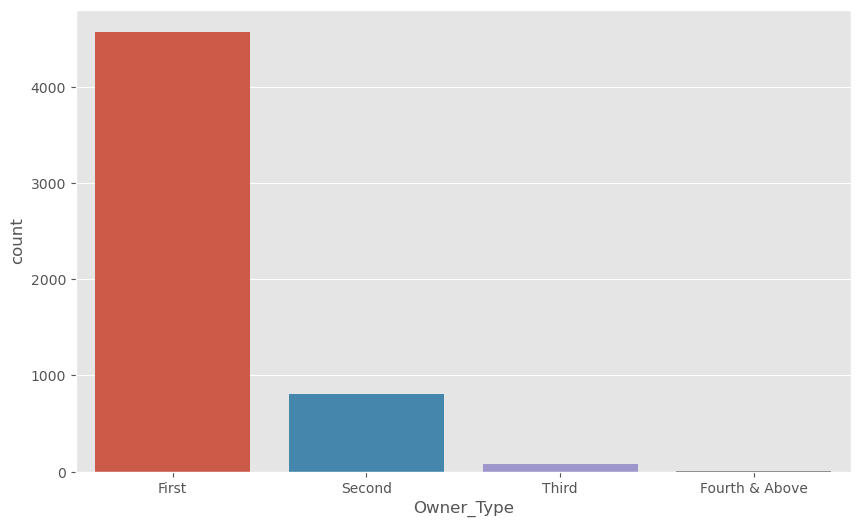

In [47]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = data, x = 'Owner_Type')
plt.show()

### Fuel Type

In [48]:
data['Fuel_Type'].value_counts().sort_values(ascending = False)

Diesel    2798
Petrol    2599
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

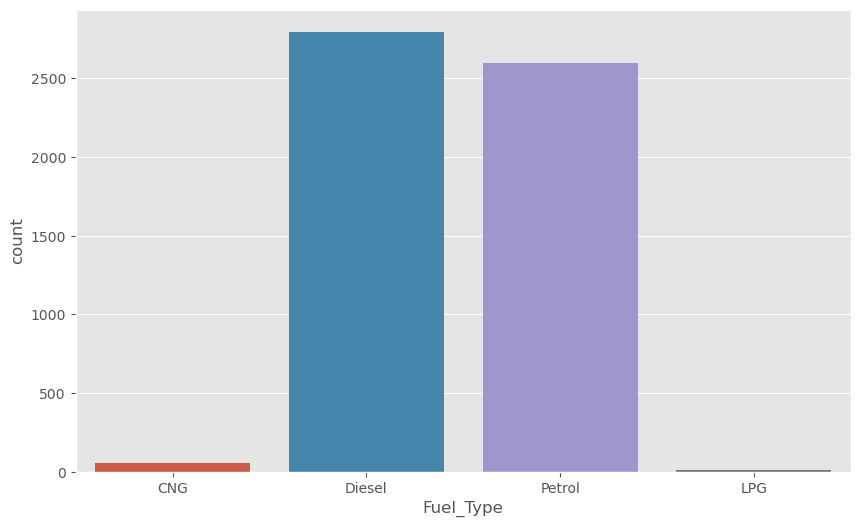

In [49]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = data, x = 'Fuel_Type')
plt.show()

### Transmission

In [50]:
data['Transmission'].value_counts().sort_values(ascending = False)

Manual       3852
Automatic    1611
Name: Transmission, dtype: int64

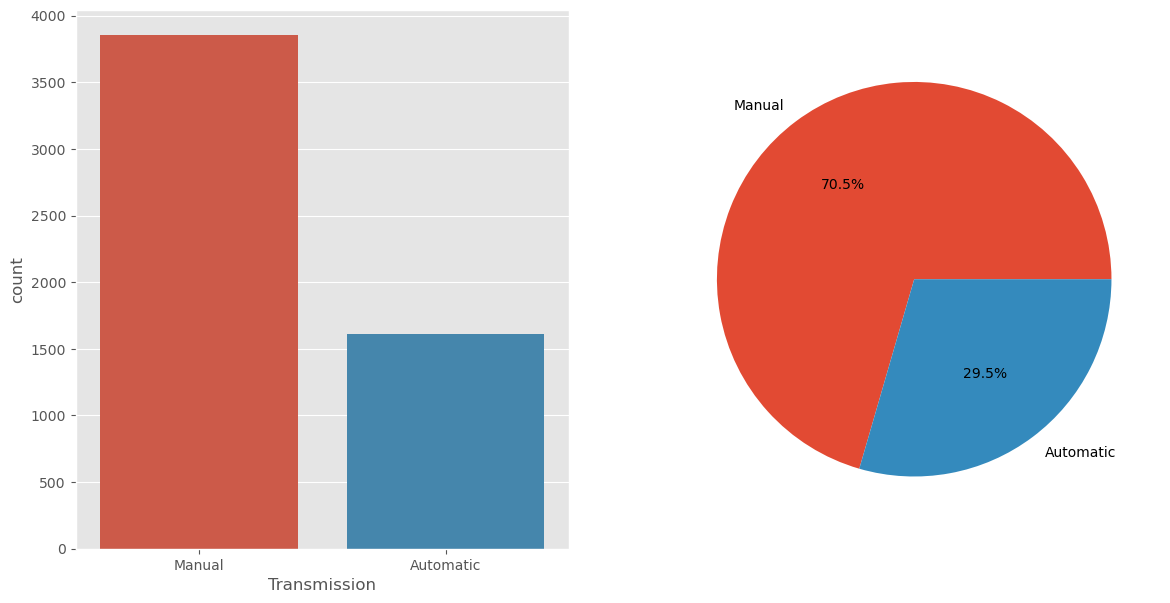

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(data = data, x = 'Transmission', ax = ax[0])
ax[1].pie(data['Transmission'].value_counts().values, labels = data['Transmission'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

### Brand

In [52]:
Brand_data = data['Brand'].value_counts().sort_values(ascending = False)
Brand_data

Maruti           1130
Hyundai          1049
Honda             571
Mercedes-Benz     300
Volkswagen        298
Toyota            296
Ford              261
BMW               243
Mahindra          233
Audi              227
Skoda             157
Tata              149
Renault           137
Chevrolet         110
Nissan             80
Land               52
Jaguar             38
Mini               26
Fiat               19
Volvo              18
Mitsubishi         18
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Name: Brand, dtype: int64

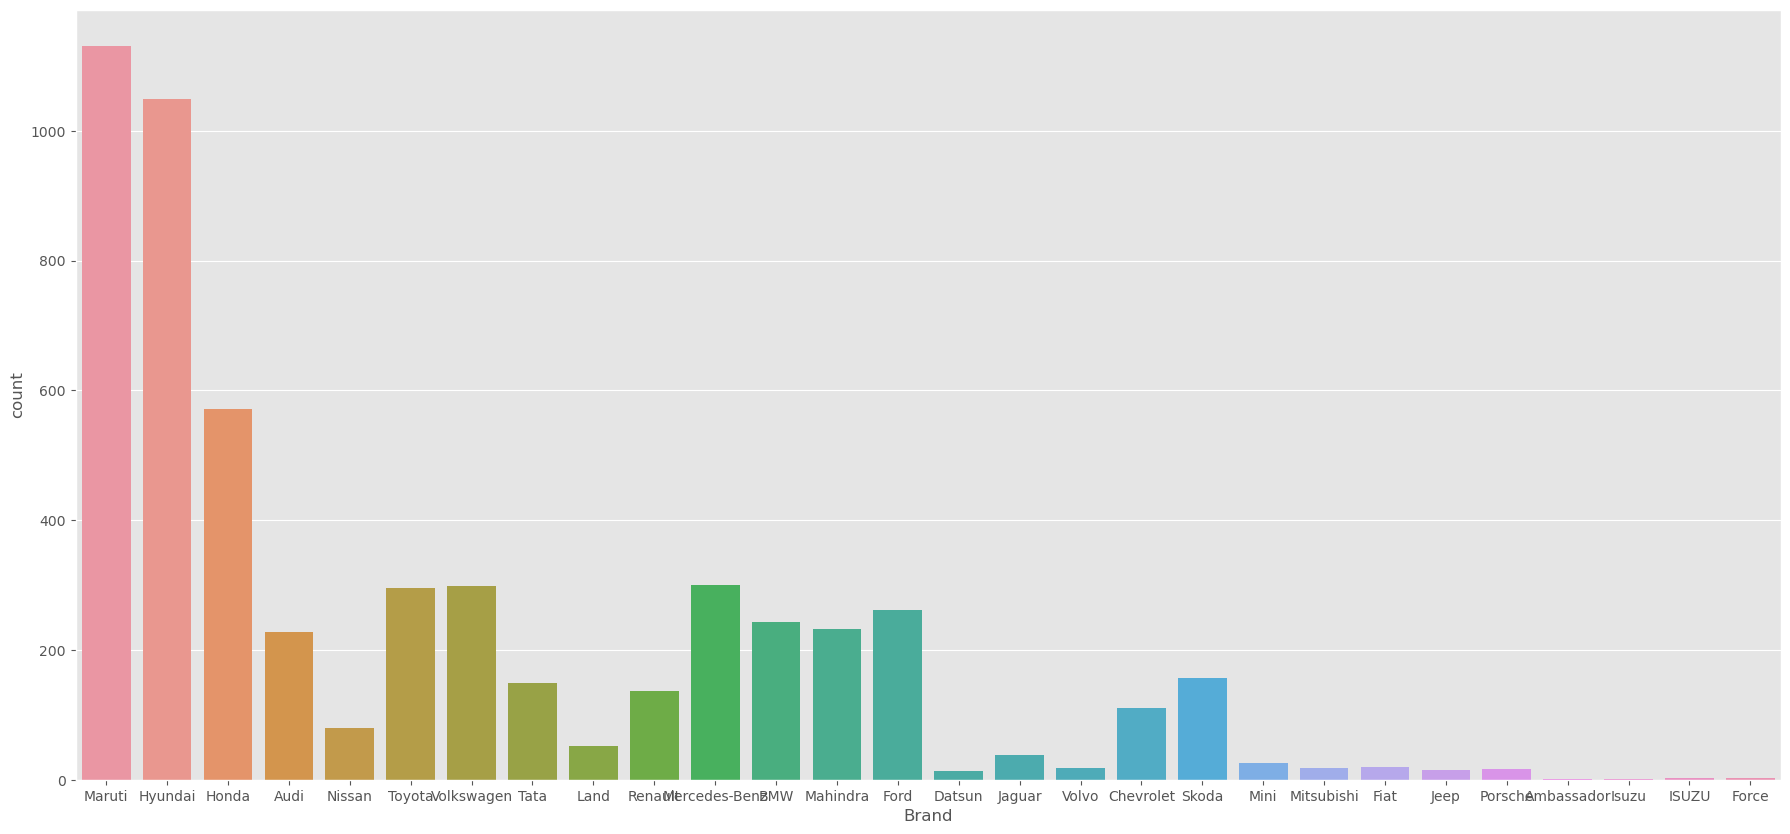

In [53]:
plt.figure(figsize = (22 ,10))
sns.countplot(data = data, x = 'Brand')
plt.show()

### Seats

In [54]:
data['Seats'].value_counts().sort_values(ascending = False)

5     4683
7      551
4       95
8       91
6       27
2       11
10       3
9        2
Name: Seats, dtype: int64

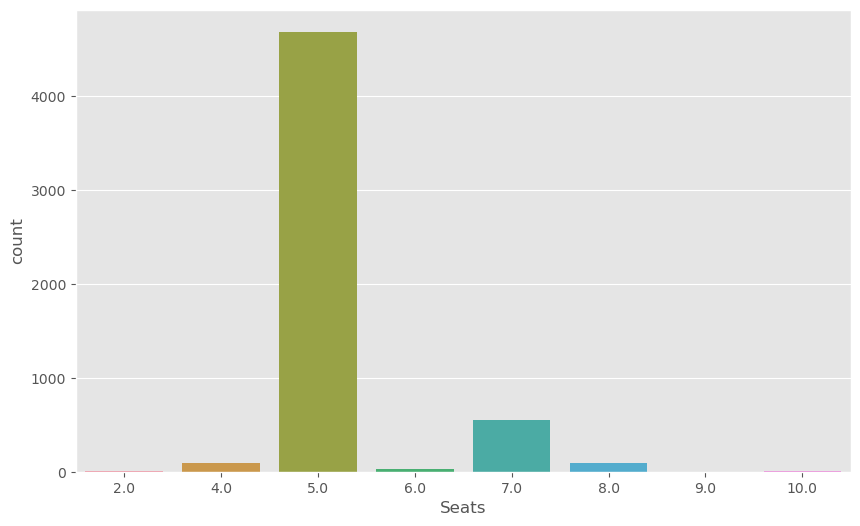

In [55]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = data, x = 'Seats')
plt.show()

### Conclusions for Univariate Analysis

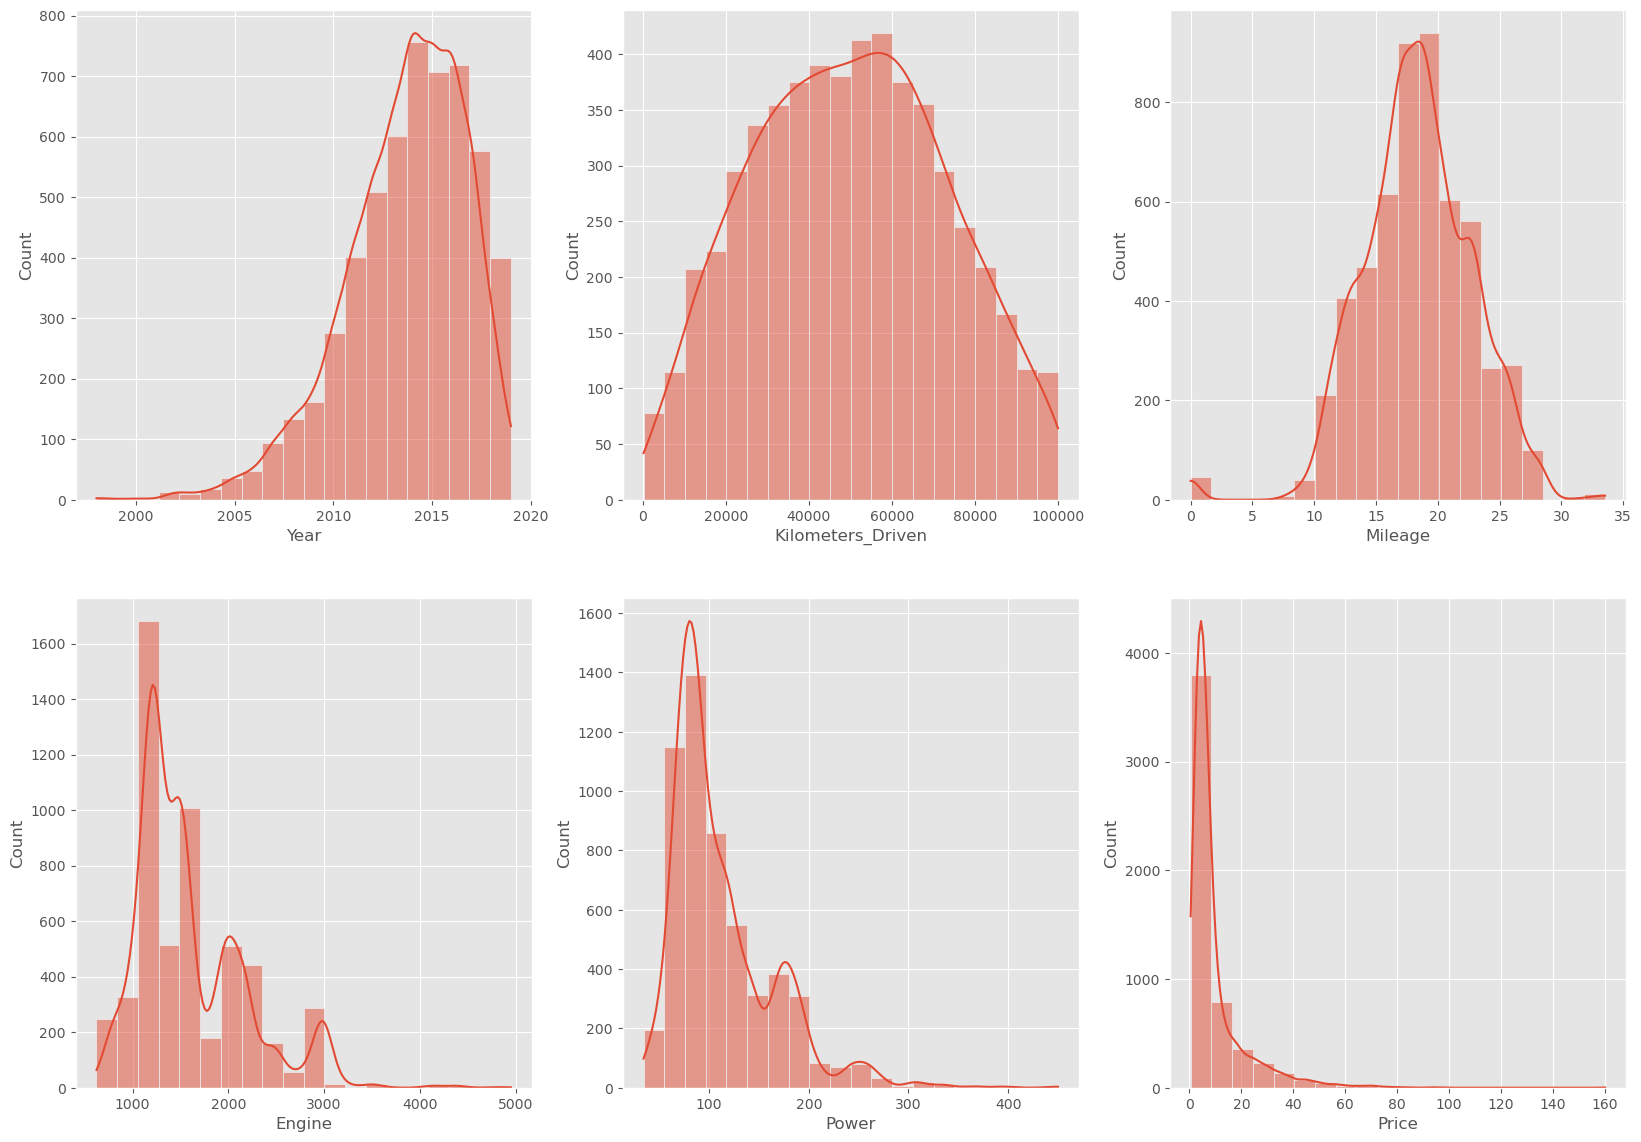

In [56]:
fig, ax = plt.subplots(2, 3, figsize = (20, 14))
sns.histplot(data = data, x = data['Year'], bins = 20, kde = True, ax = ax[0, 0])
sns.histplot(data = data, x = data['Kilometers_Driven'], bins = 20, kde = True, ax = ax[0, 1])
sns.histplot(data = data, x = data['Mileage'], bins = 20, kde = True, ax = ax[0, 2])
sns.histplot(data = data, x = data['Engine'], bins = 20, kde = True, ax = ax[1, 0])
sns.histplot(data = data, x = data['Power'], bins = 20, kde = True, ax = ax[1, 1])
sns.histplot(data = data, x = data['Price'], bins = 20, kde = True, ax = ax[1, 2])
plt.show()

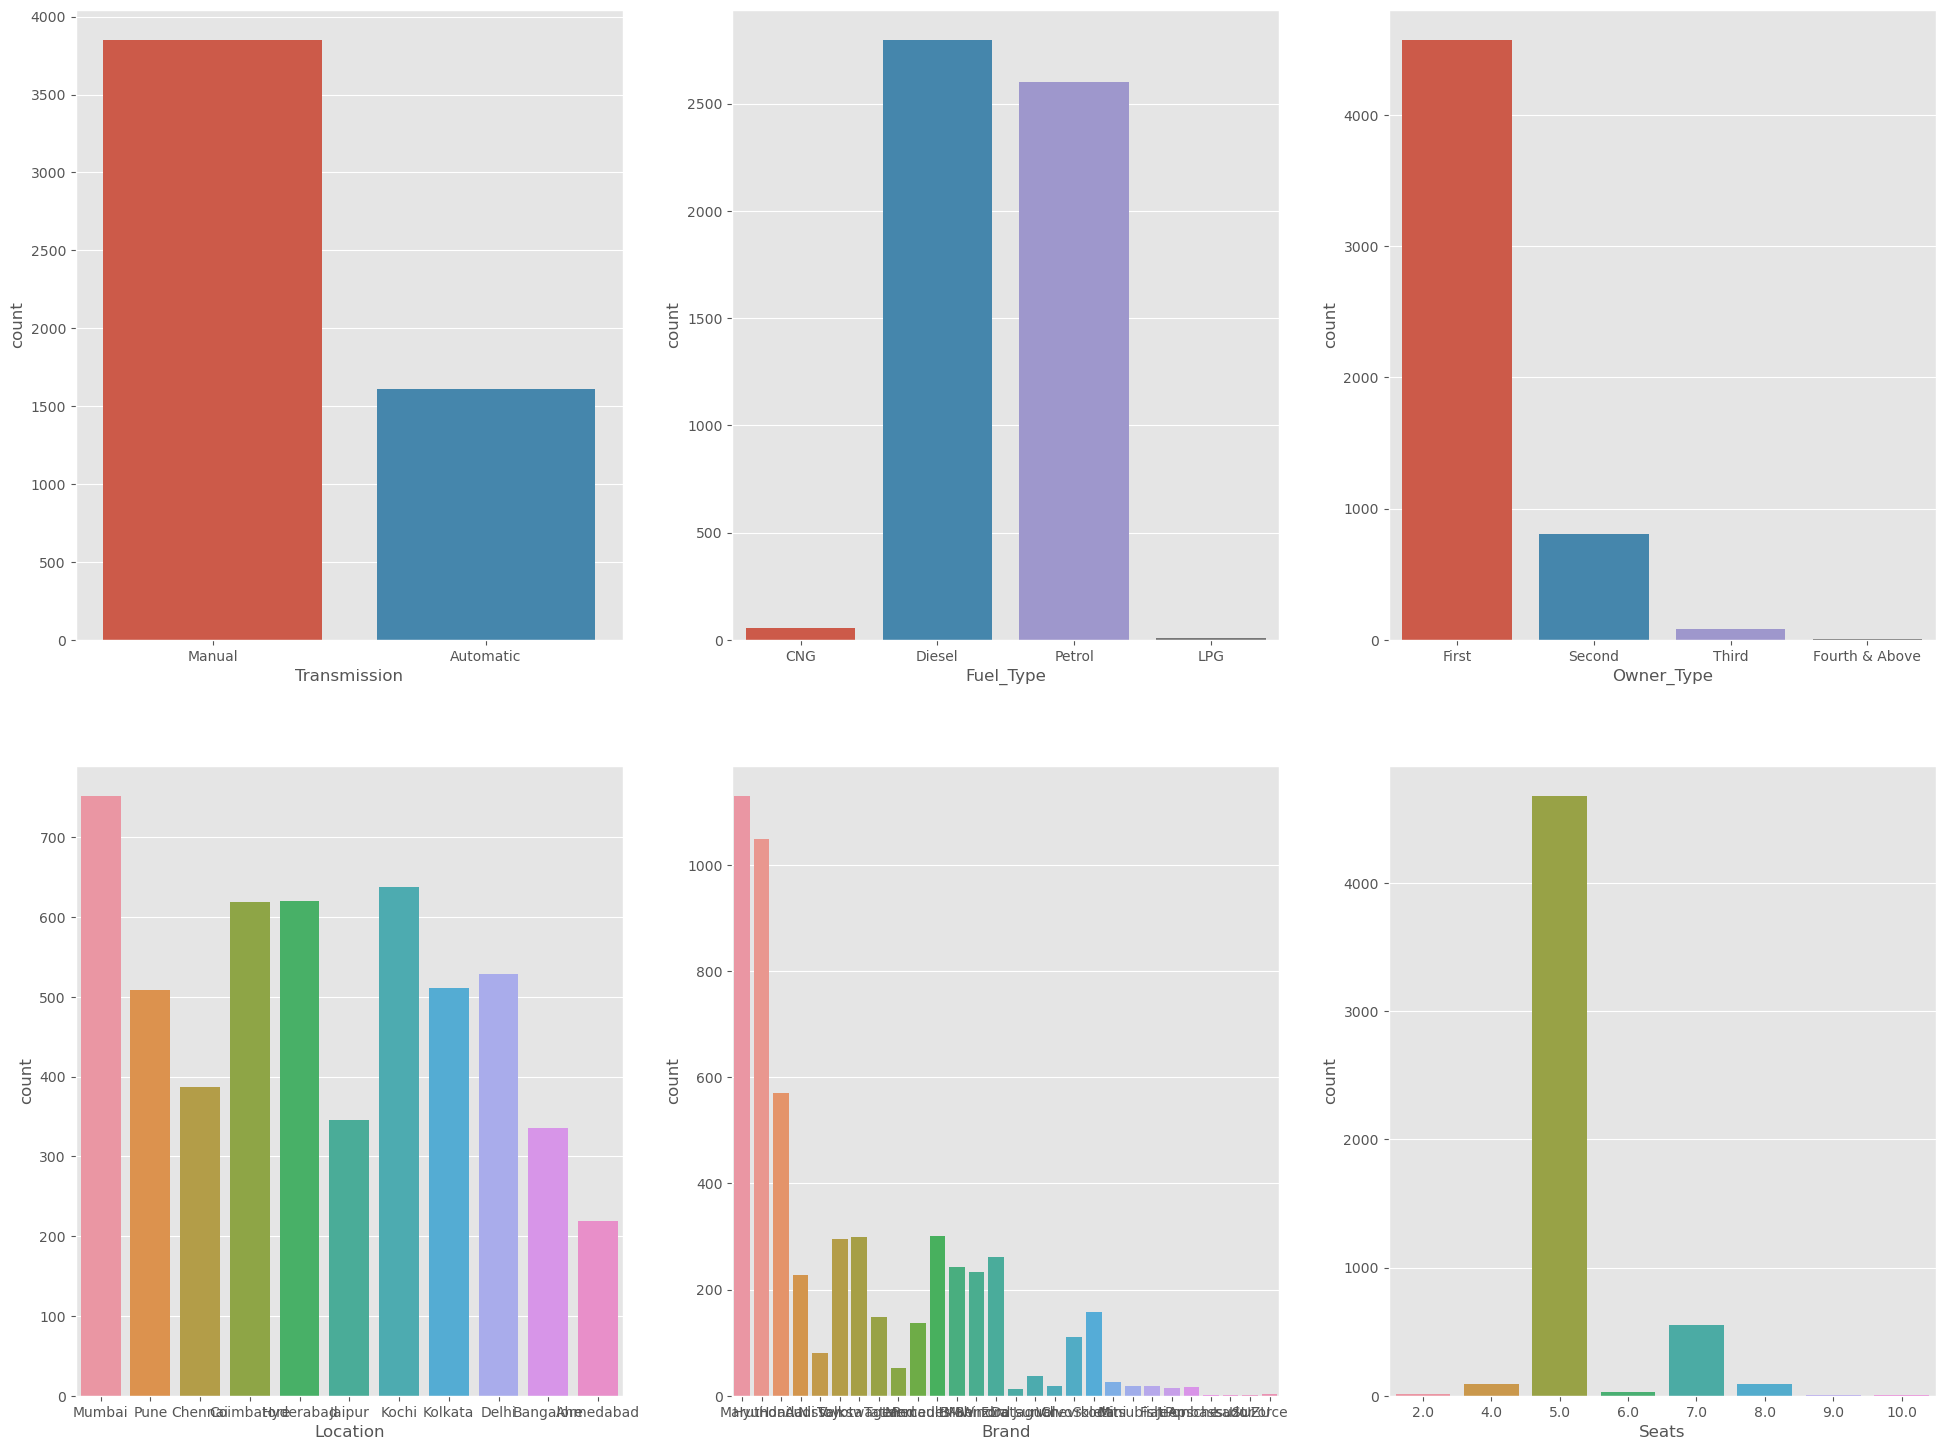

In [57]:
fig, ax = plt.subplots(2, 3, figsize = (24, 18))
sns.countplot(data = data, x = 'Transmission', ax = ax[0, 0])
sns.countplot(data = data, x = 'Fuel_Type', ax = ax[0, 1])
sns.countplot(data = data, x = 'Owner_Type', ax = ax[0, 2])
sns.countplot(data = data, x = 'Location', ax = ax[1, 0])
sns.countplot(data = data, x = 'Brand', ax = ax[1, 1])
sns.countplot(data = data, x = 'Seats', ax = ax[1, 2])
plt.show()

## 2. Bivariate Analysis

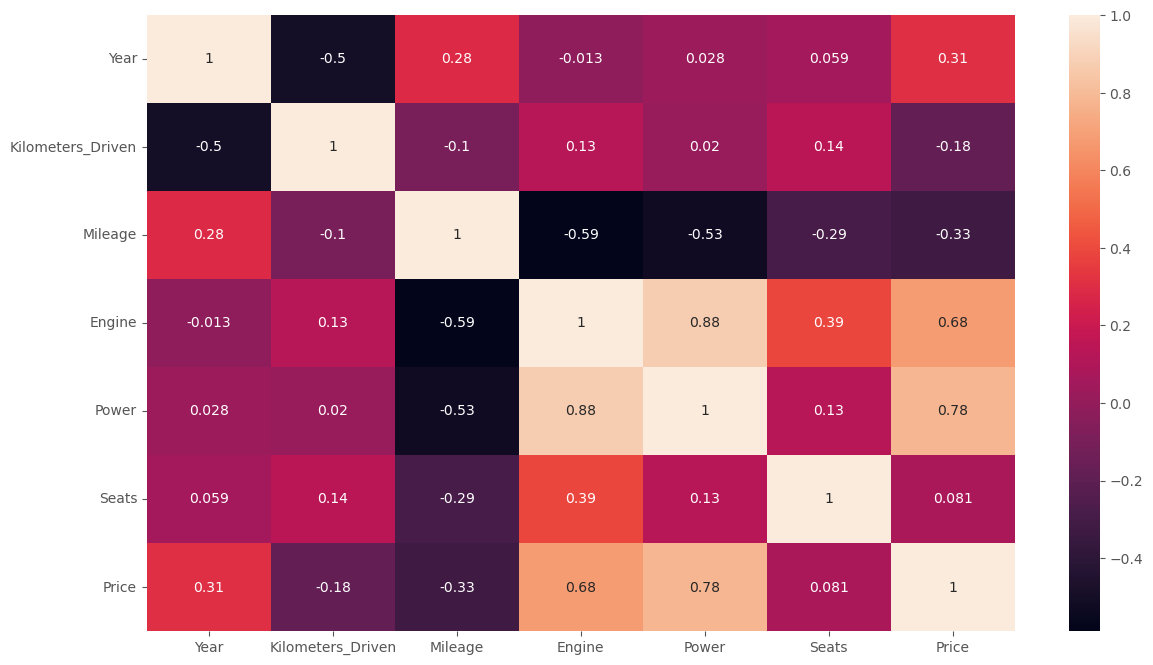

In [58]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### Year & Price

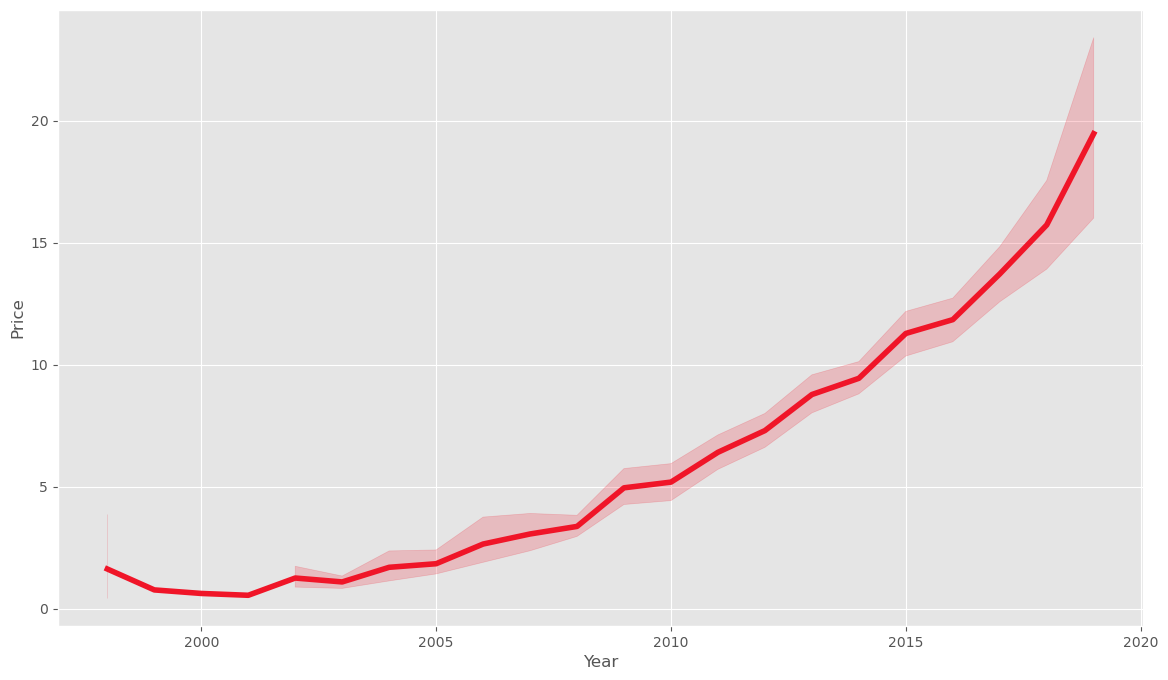

In [59]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Year', y = 'Price', linewidth = 4, color = '#f01528')
plt.show()

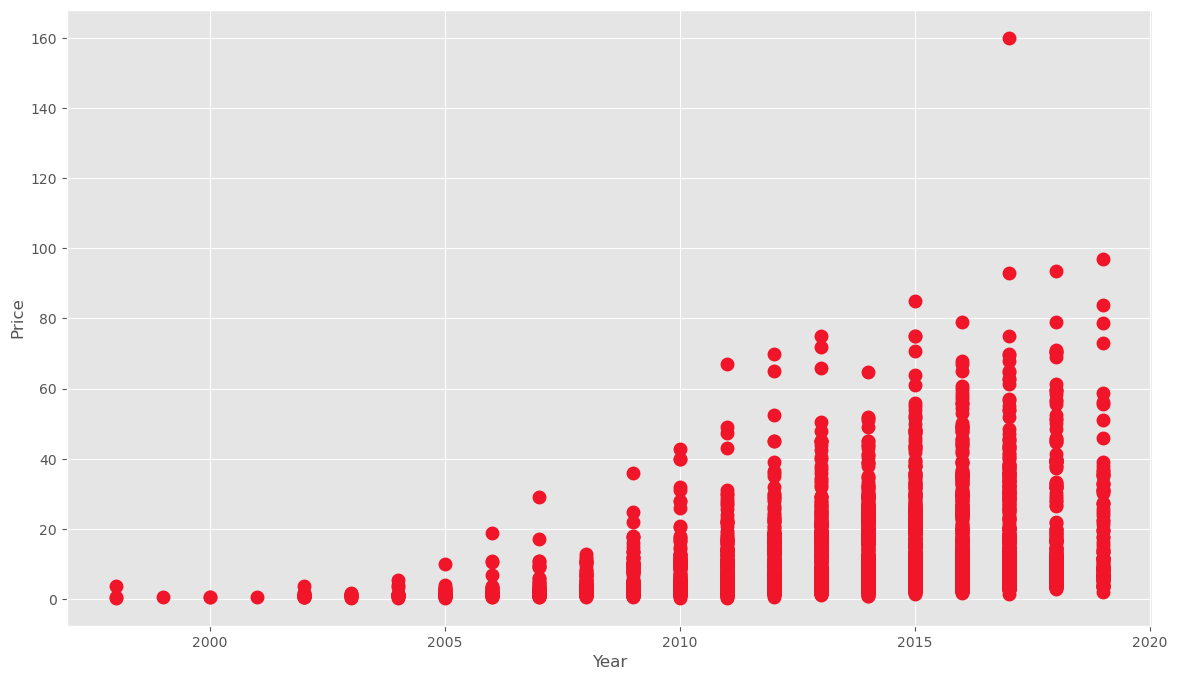

In [60]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Year', y = 'Price', linewidth = 4, color = '#f01528', edgecolor = "#f01528")
plt.show()

#### Note:
**There is a positive relationship between the price of the car and the year of the car, as the price of the car increases every year.**

### Kilometers_Driven & Price

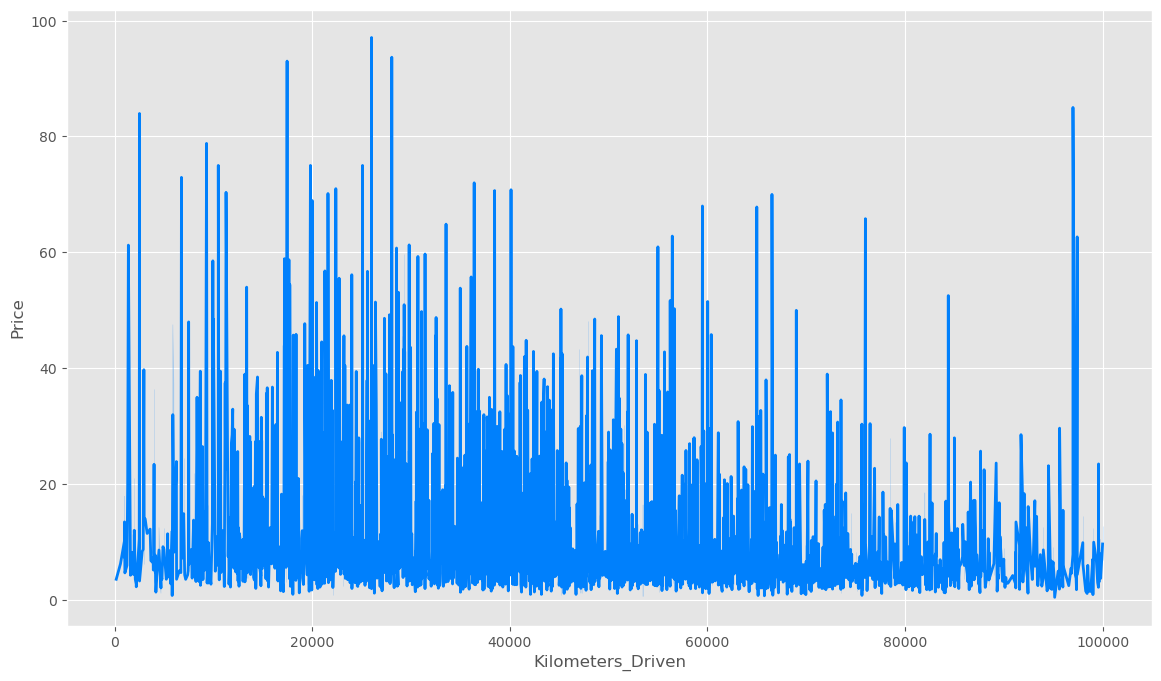

In [61]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Kilometers_Driven', y = 'Price', linewidth = 2, color = '#0080fc')
plt.show()

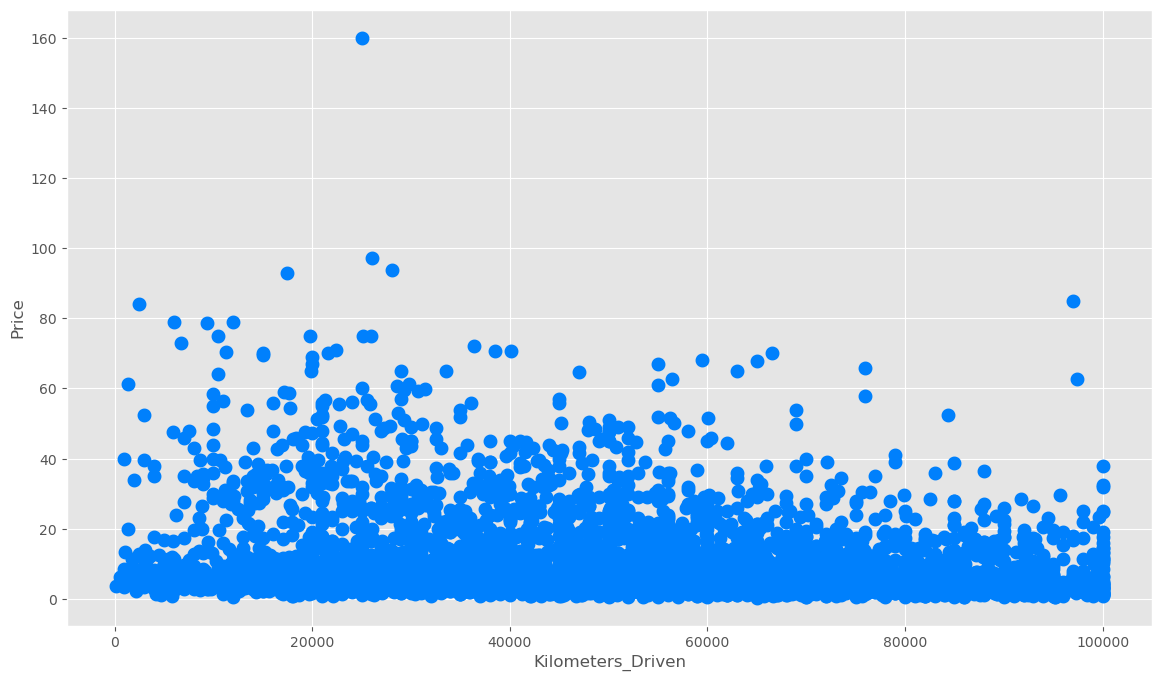

In [62]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Kilometers_Driven', y = 'Price', linewidth = 4, color = '#0080fc', edgecolor = "#0080fc")
plt.show()

#### Note:
**The relation between kilometers driven and car price is a measure of how much a car has been driven. In general, as the number of kilometers driven increases, the price of the car tends to decrease.**

### Mileage & Price

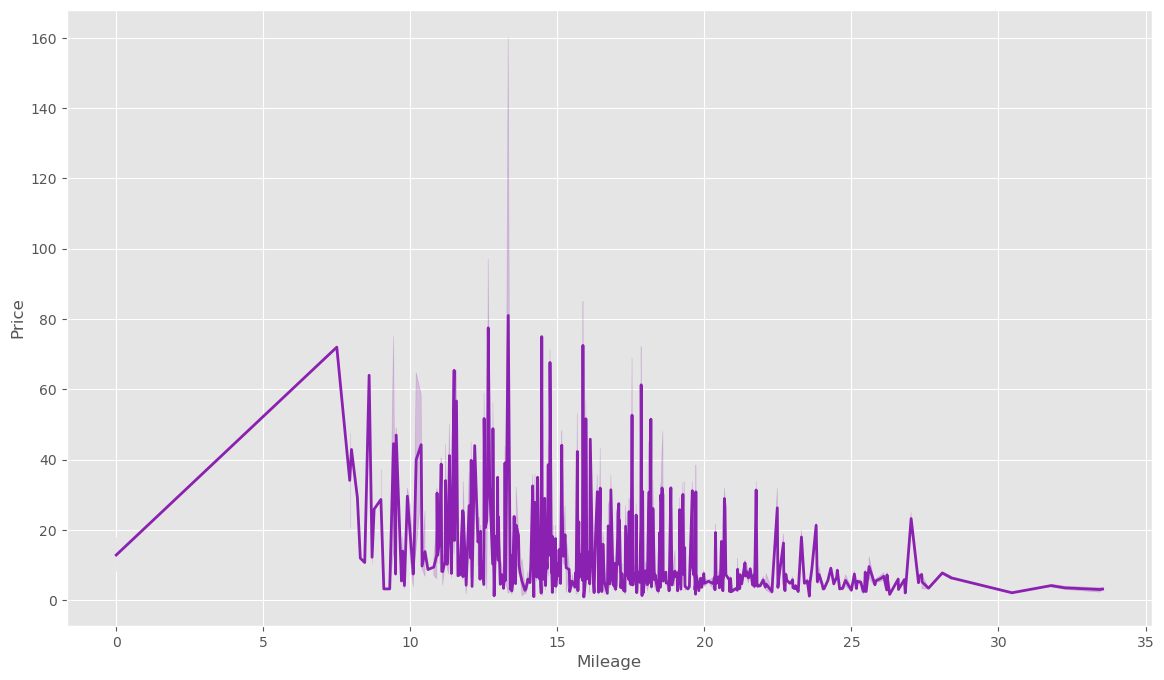

In [63]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Mileage', y = 'Price', linewidth = 2, color = '#8b21b0')
plt.show()

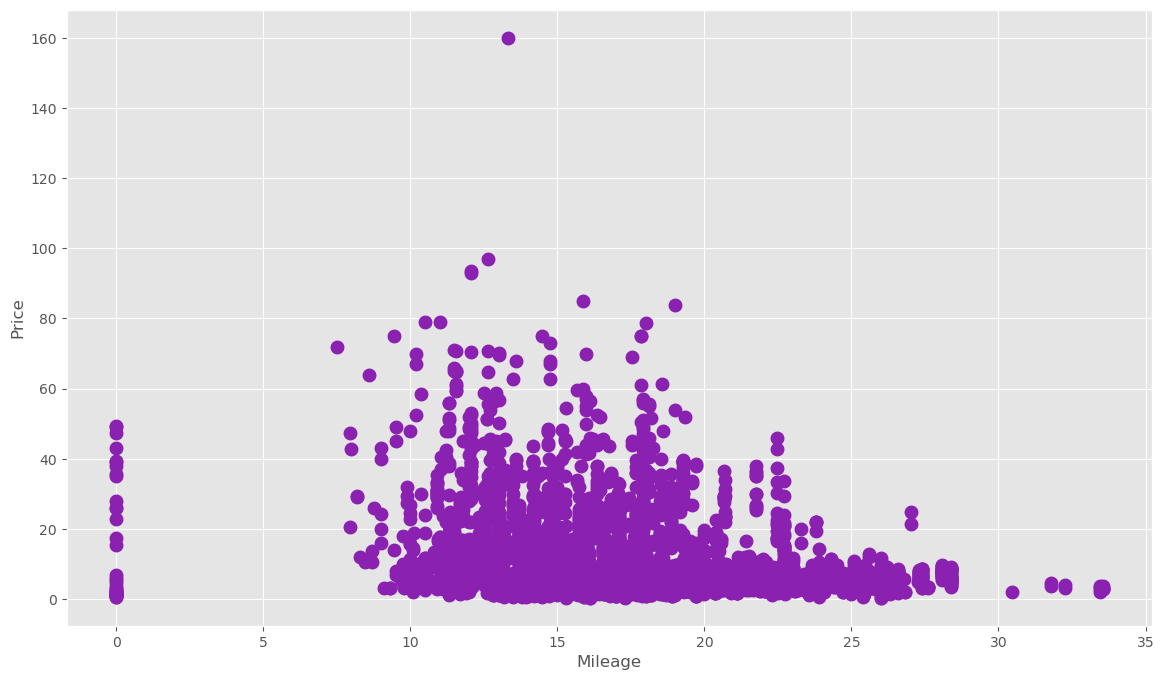

In [64]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Mileage', y = 'Price', linewidth = 4, color = '#8b21b0', edgecolor = "#8b21b0")
plt.show()

#### Note: 
**The relation between mileage and car price is negative, meaning that as the mileage of a car increases, the price of the car tends to decrease. This is because higher mileage indicates that the car has been driven more, which can lead to more wear and tear on the engine, transmission, and other components**

### Engine & Price

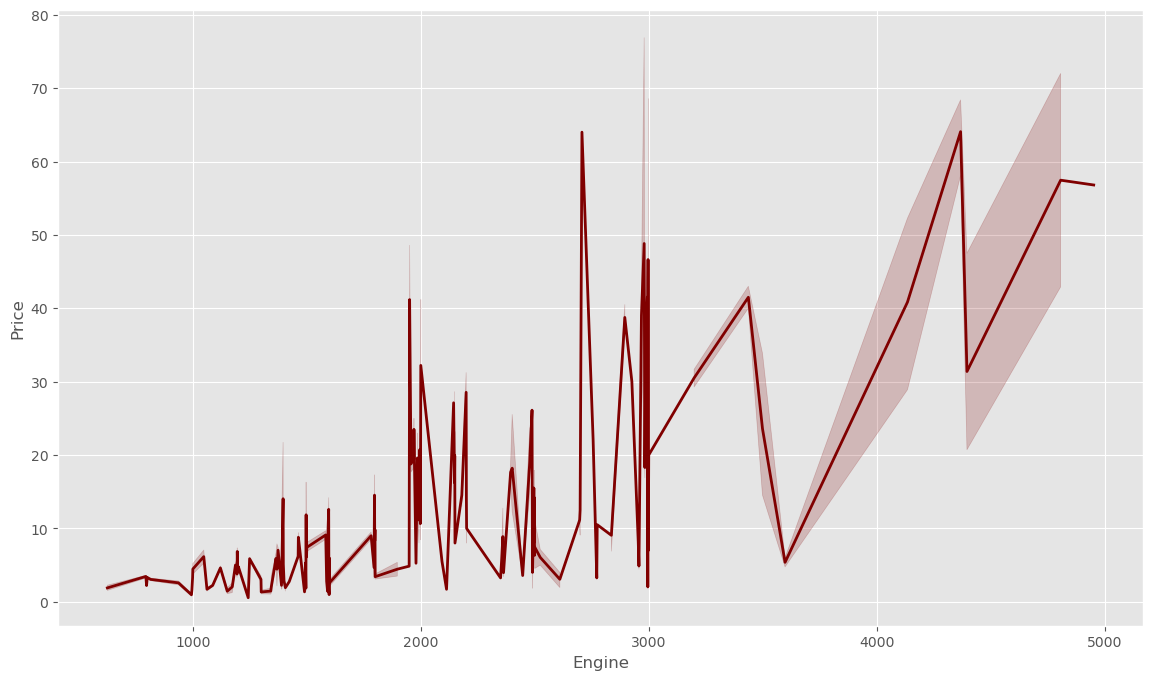

In [65]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Engine', y = 'Price', linewidth = 2, color = '#800000')
plt.show()

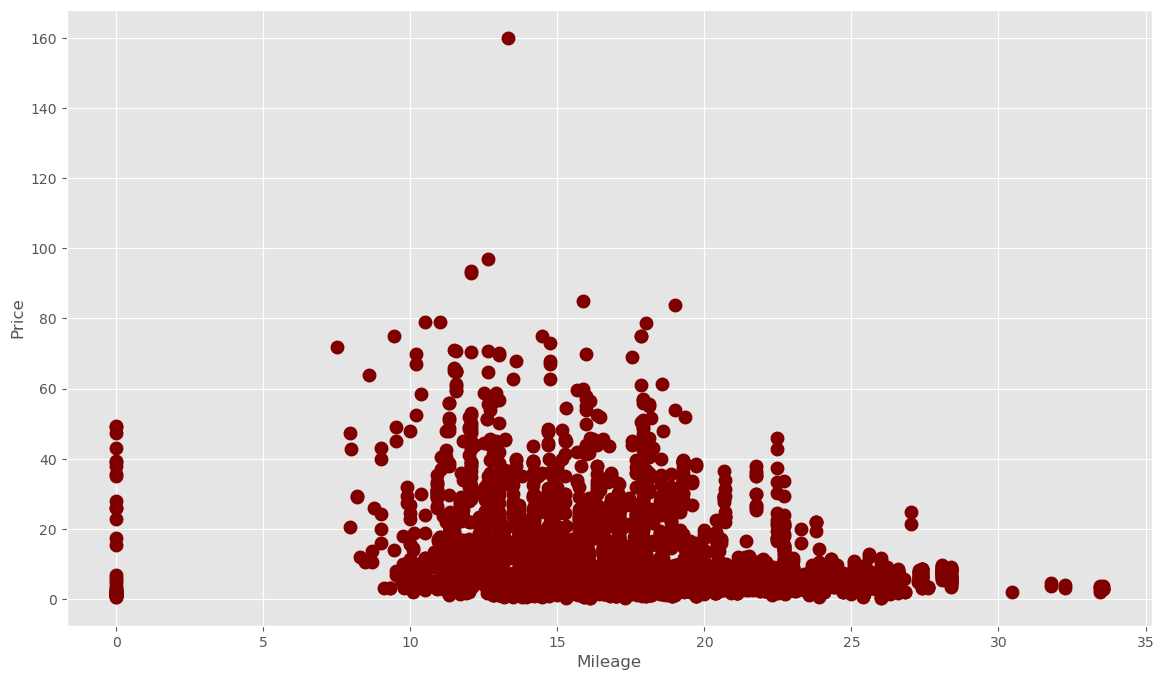

In [66]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Mileage', y = 'Price', linewidth = 4, color = '#800000', edgecolor = "#800000")
plt.show()

#### Note:
**The relation between engine and car price is positive, meaning that the car engine is one of the factors that can impact the price of a car. Generally, a more powerful engine will increase the price of the car.**

### Power & Price

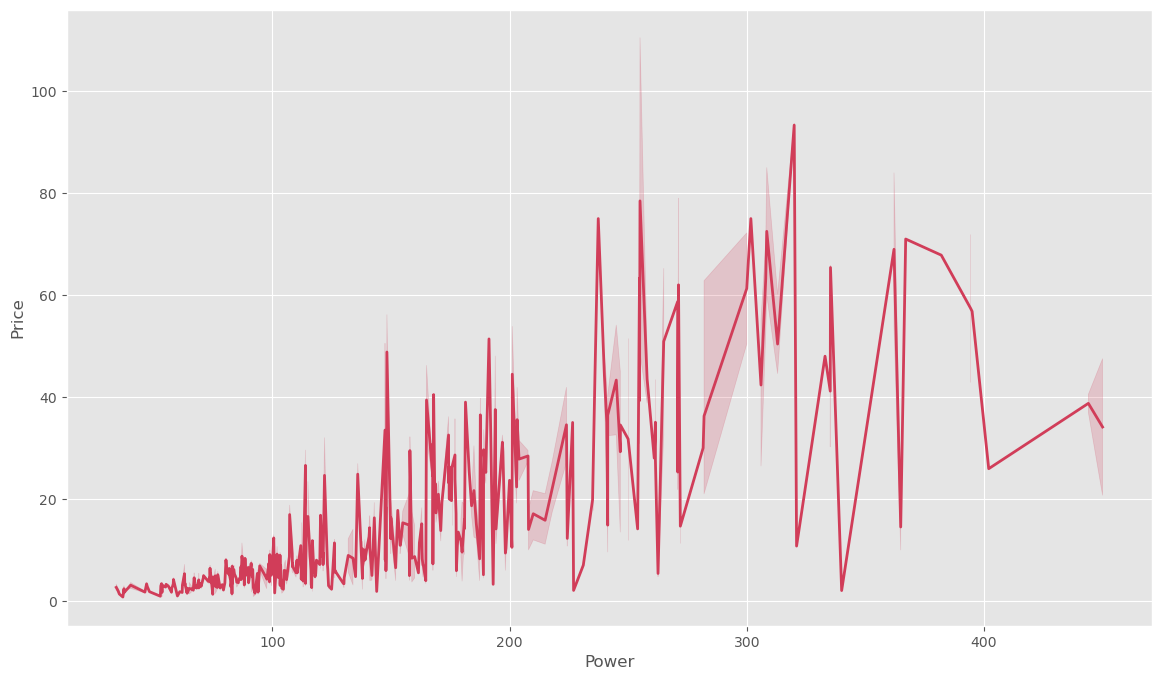

In [67]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Power', y = 'Price', linewidth = 2, color = '#d13d59')
plt.show()

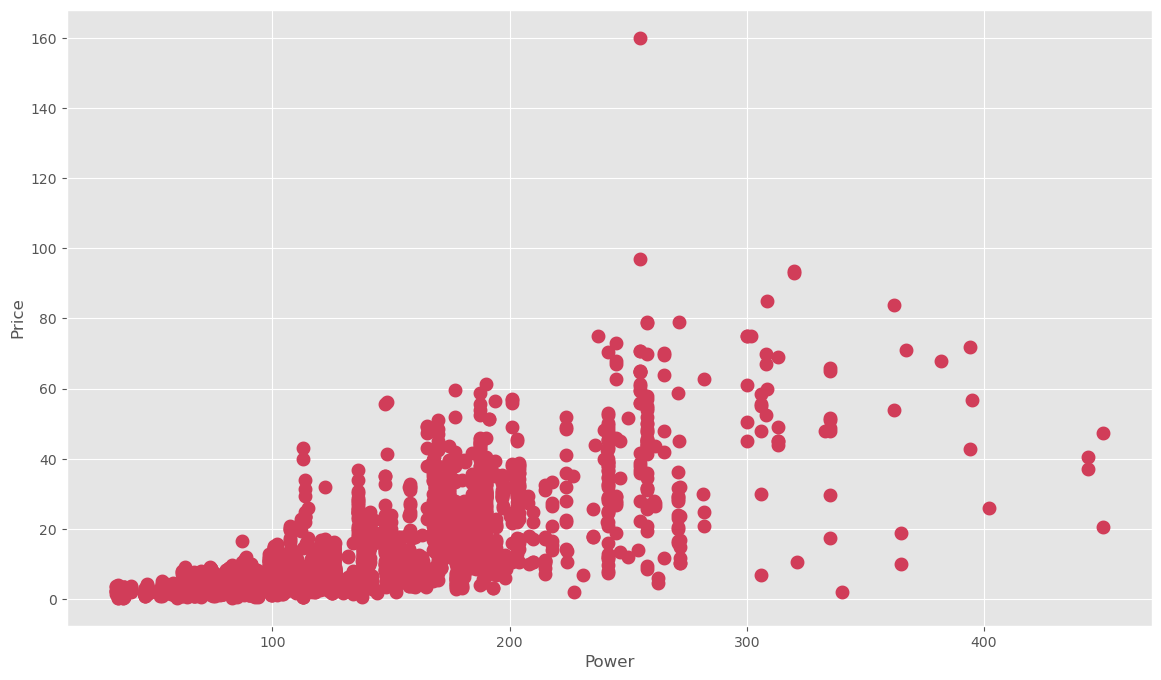

In [68]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Power', y = 'Price', linewidth = 4, color = '#d13d59', edgecolor = "#d13d59")
plt.show()

#### Note:
**The relation between the power of a car and the price of a car is positive, meaning that cars with more power tend to be more expensive than cars with less power. This is because higher-powered cars often have larger engines and more advanced technology, which can increase their manufacturing costs.**

### Seats & Price

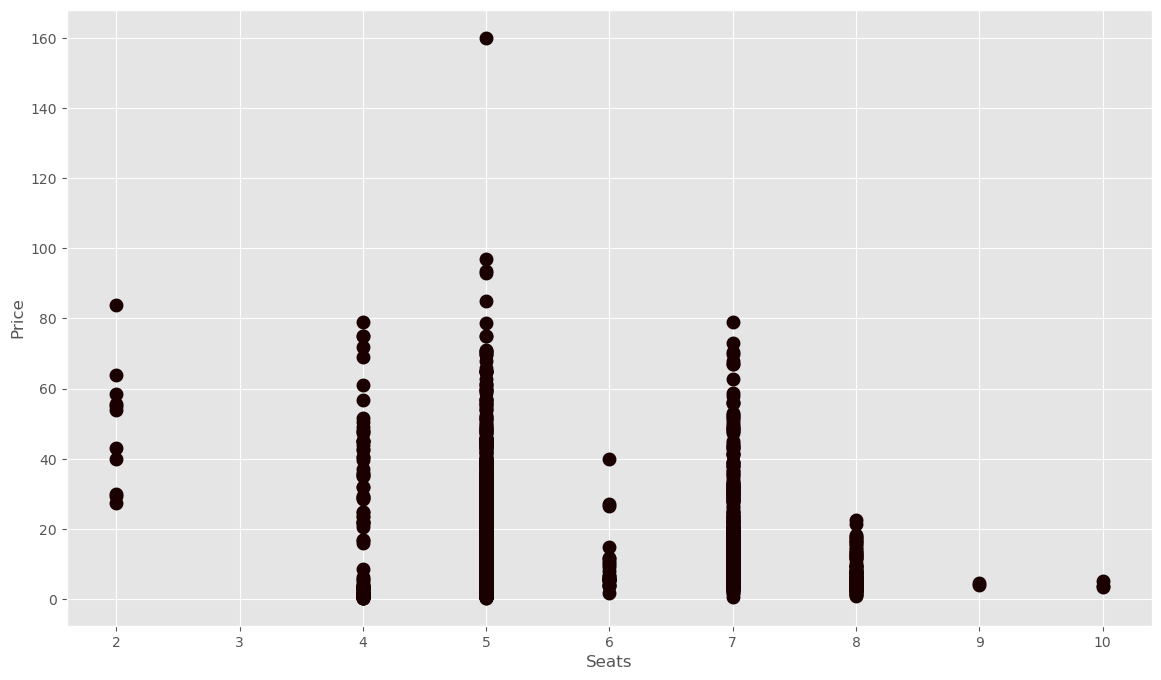

In [69]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Seats', y = 'Price', linewidth = 4, color = '#1a0000', edgecolor = "#1a0000")
plt.show()

#### Note:
**The number of seats in a car can affect its price, cars that have 5 seats have the highest price, followed by cars that have 4 and 7 seats.**

### Fuel_Type & Price

In [70]:
data_fuel_price = data.groupby('Fuel_Type')['Price'].median().sort_values(ascending = False)
data_fuel_price

Fuel_Type
Diesel   8
Petrol   4
CNG      3
LPG      3
Name: Price, dtype: float64

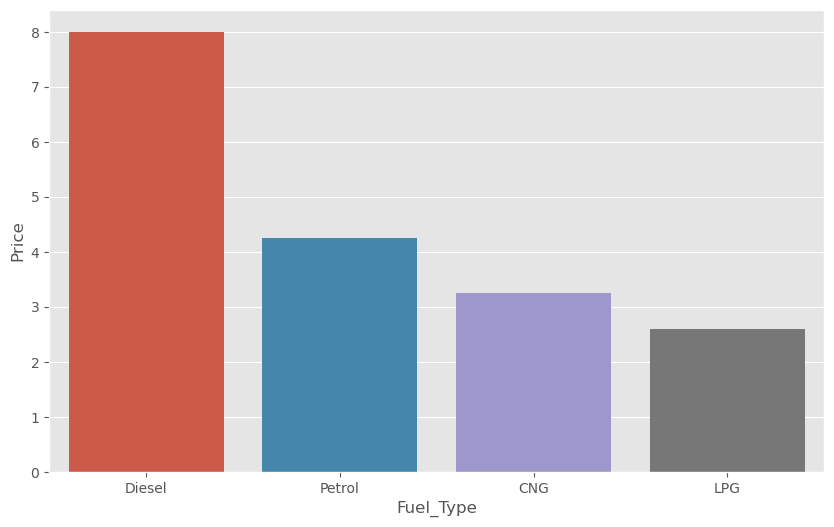

In [71]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_fuel_price.index, y = data_fuel_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars that use fuel-type diesel have higher prices.**

### Owner_Type & Price

In [72]:
data_owner_price = data.groupby('Owner_Type')['Price'].median().sort_values(ascending = False)
data_owner_price

Owner_Type
First            6
Second           4
Fourth & Above   3
Third            2
Name: Price, dtype: float64

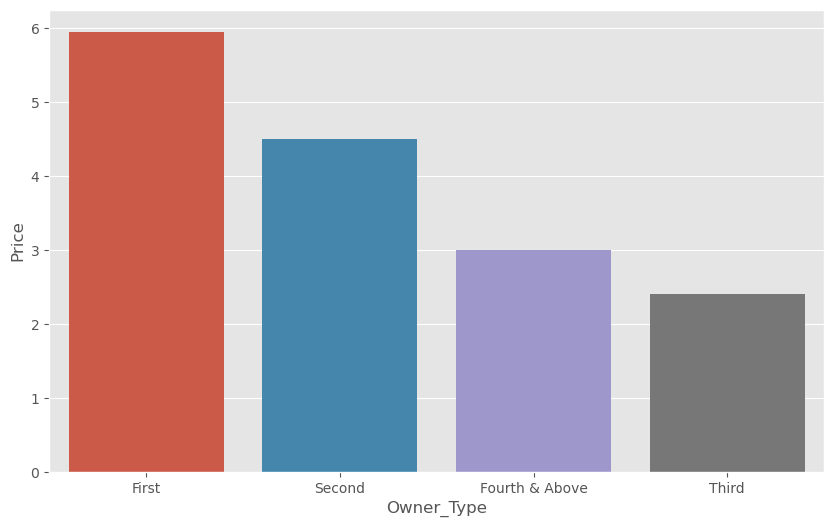

In [73]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_owner_price.index, y = data_owner_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars that had only one owner have a higher price than the cars that had multiple owners.**

### Location & Price

In [74]:
data_loca_price = data.groupby('Location')['Price'].median().sort_values(ascending = False)
data_loca_price

Location
Coimbatore   8
Bangalore    7
Kochi        7
Ahmedabad    6
Hyderabad    6
Mumbai       6
Delhi        6
Chennai      5
Jaipur       4
Pune         4
Kolkata      4
Name: Price, dtype: float64

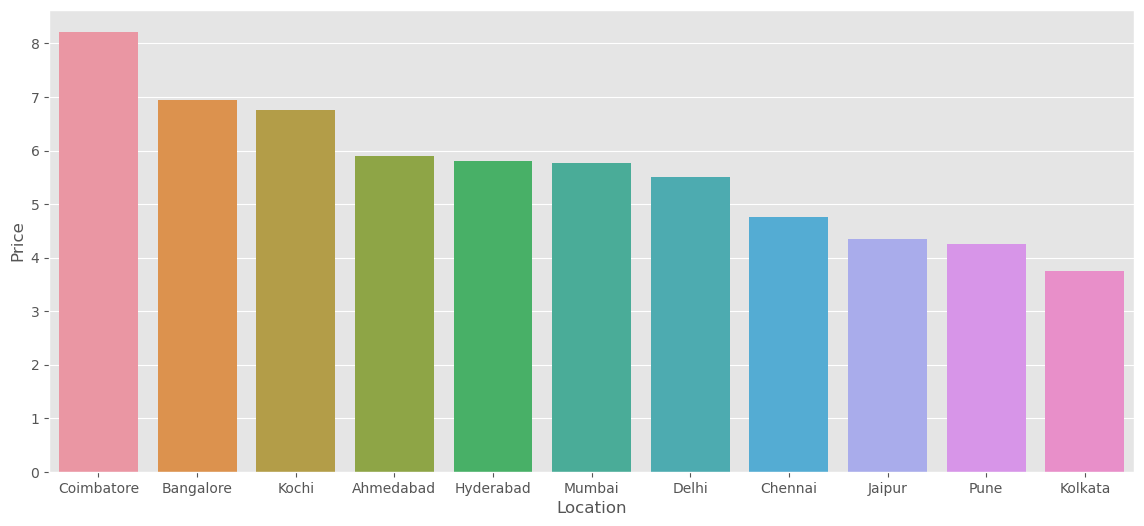

In [75]:
plt.figure(figsize = (14, 6))
ax = sns.barplot(x = data_loca_price.index, y = data_loca_price.values)
ax.set_ylabel("Price")
plt.show()

#### Notes:
**Cars in Coimbatore are higher priced than cars in other regions.**

**Cars in Ahmedabad, Hyderabad, Mumbai, and Delhi are the same price.**

### Transmission & Price

In [76]:
data_trans_price = data.groupby('Transmission')['Price'].median().sort_values(ascending = False)
data_trans_price

Transmission
Automatic   16
Manual       5
Name: Price, dtype: float64

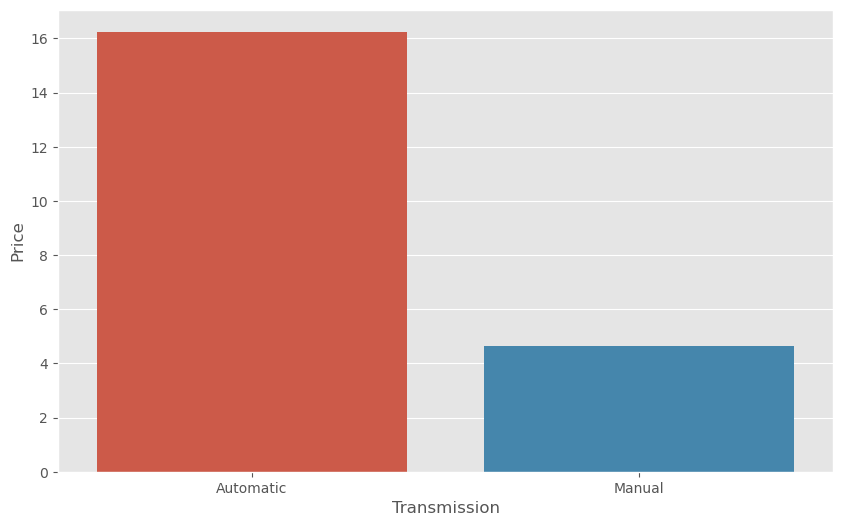

In [77]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_trans_price.index, y = data_trans_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars that have a transmission automatic are higher priced than the cars that have a transmission Manual.**

### Brand & Price

In [78]:
data_brand_price = data.groupby('Brand')['Price'].median().sort_values(ascending = False).nlargest(30)
data_brand_price

Brand
Porsche         49
Land            36
Jaguar          31
Mercedes-Benz   24
Mini            24
Audi            24
BMW             22
Isuzu           20
Volvo           19
Jeep            18
ISUZU           12
Mitsubishi      12
Toyota          12
Force            8
Mahindra         8
Skoda            6
Ford             6
Renault          6
Honda            5
Volkswagen       5
Hyundai          5
Nissan           4
Maruti           4
Tata             3
Datsun           3
Fiat             3
Chevrolet        3
Ambassador       1
Name: Price, dtype: float64

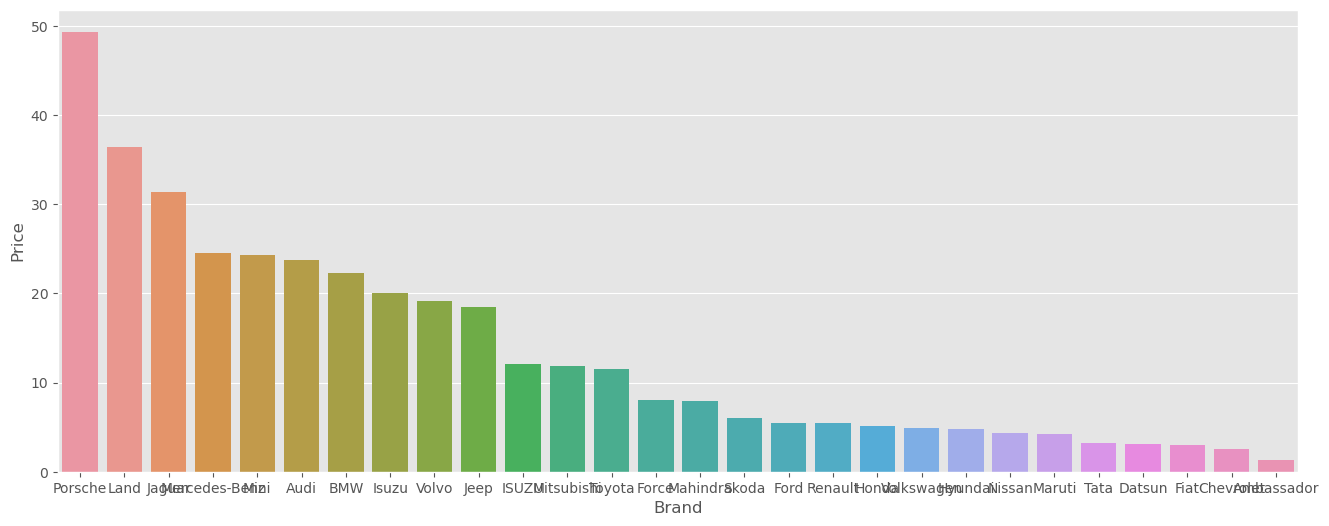

In [79]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(x = data_brand_price.index, y = data_brand_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars from the type Porsche have a higher price compared to other types of cars and come after her the cars from the type Land.**

### Conclusions for Bivariate Analysis

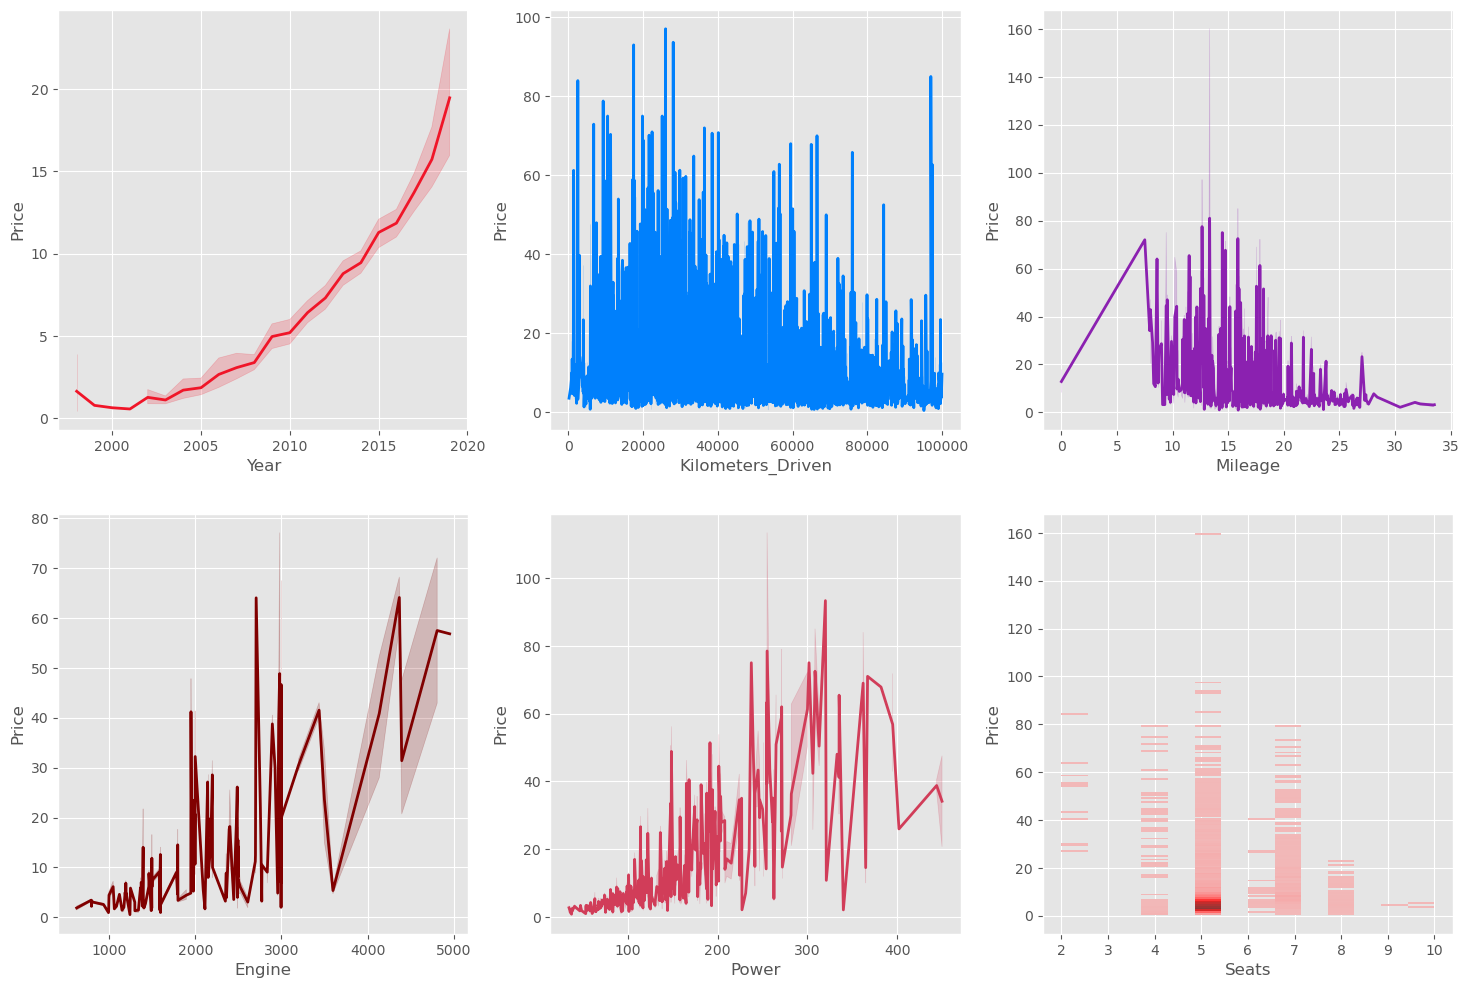

In [80]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
sns.lineplot(data = data, x = 'Year', y = 'Price', linewidth = 2, color = '#f01528', ax = ax[0, 0])
sns.lineplot(data = data, x = 'Kilometers_Driven', y = 'Price', linewidth = 2, color = '#0080fc', ax = ax[0, 1])
sns.lineplot(data = data, x = 'Mileage', y = 'Price', linewidth = 2, color = '#8b21b0', ax = ax[0, 2])
sns.lineplot(data = data, x = 'Engine', y = 'Price', linewidth = 2, color = '#800000', ax = ax[1, 0])
sns.lineplot(data = data, x = 'Power', y = 'Price', linewidth = 2, color = '#d13d59', ax = ax[1, 1])
sns.histplot(data = data, x = 'Seats', y = 'Price', color = '#1a0000', ax = ax[1, 2])
plt.show()

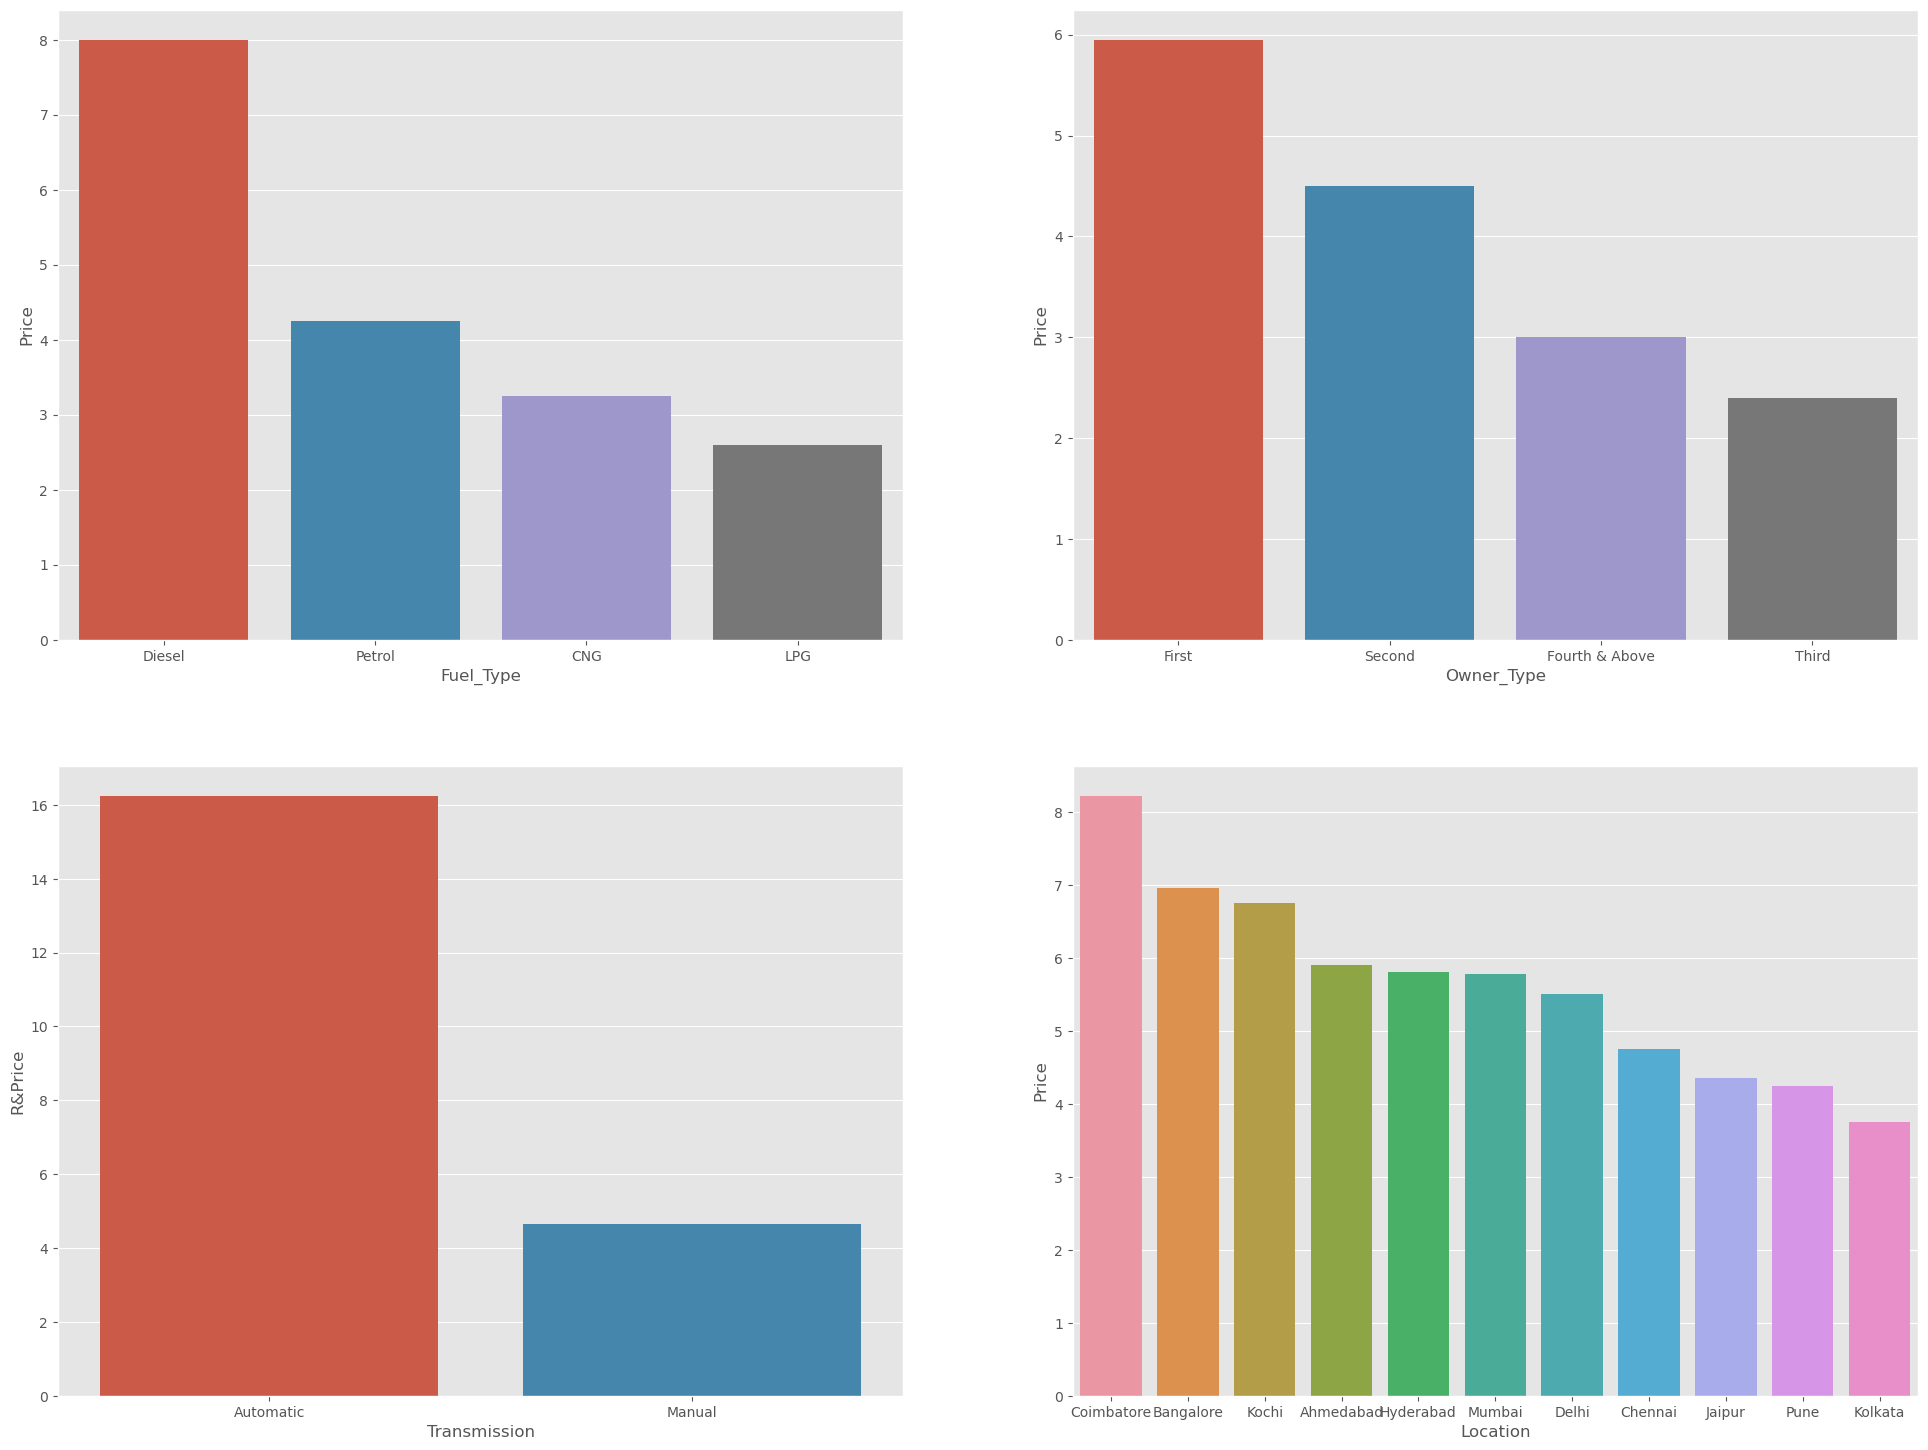

In [81]:
fig, ax = plt.subplots(2, 2, figsize = (24, 18))
sns.barplot(x = data_fuel_price.index, y = data_fuel_price.values, ax = ax[0, 0])
sns.barplot(x = data_owner_price.index, y = data_owner_price.values, ax = ax[0, 1])
sns.barplot(x = data_trans_price.index, y = data_trans_price.values, ax = ax[1, 0])
sns.barplot(x = data_loca_price.index, y = data_loca_price.values, ax = ax[1, 1])
ax[0, 0].set_ylabel('Price', size = 12)
ax[0, 1].set_ylabel('Price', size = 12)
ax[1, 0].set_ylabel('R&Price', size = 12)
ax[1, 1].set_ylabel('Price', size = 12)
plt.show()

## 3. Multivariate Analysis

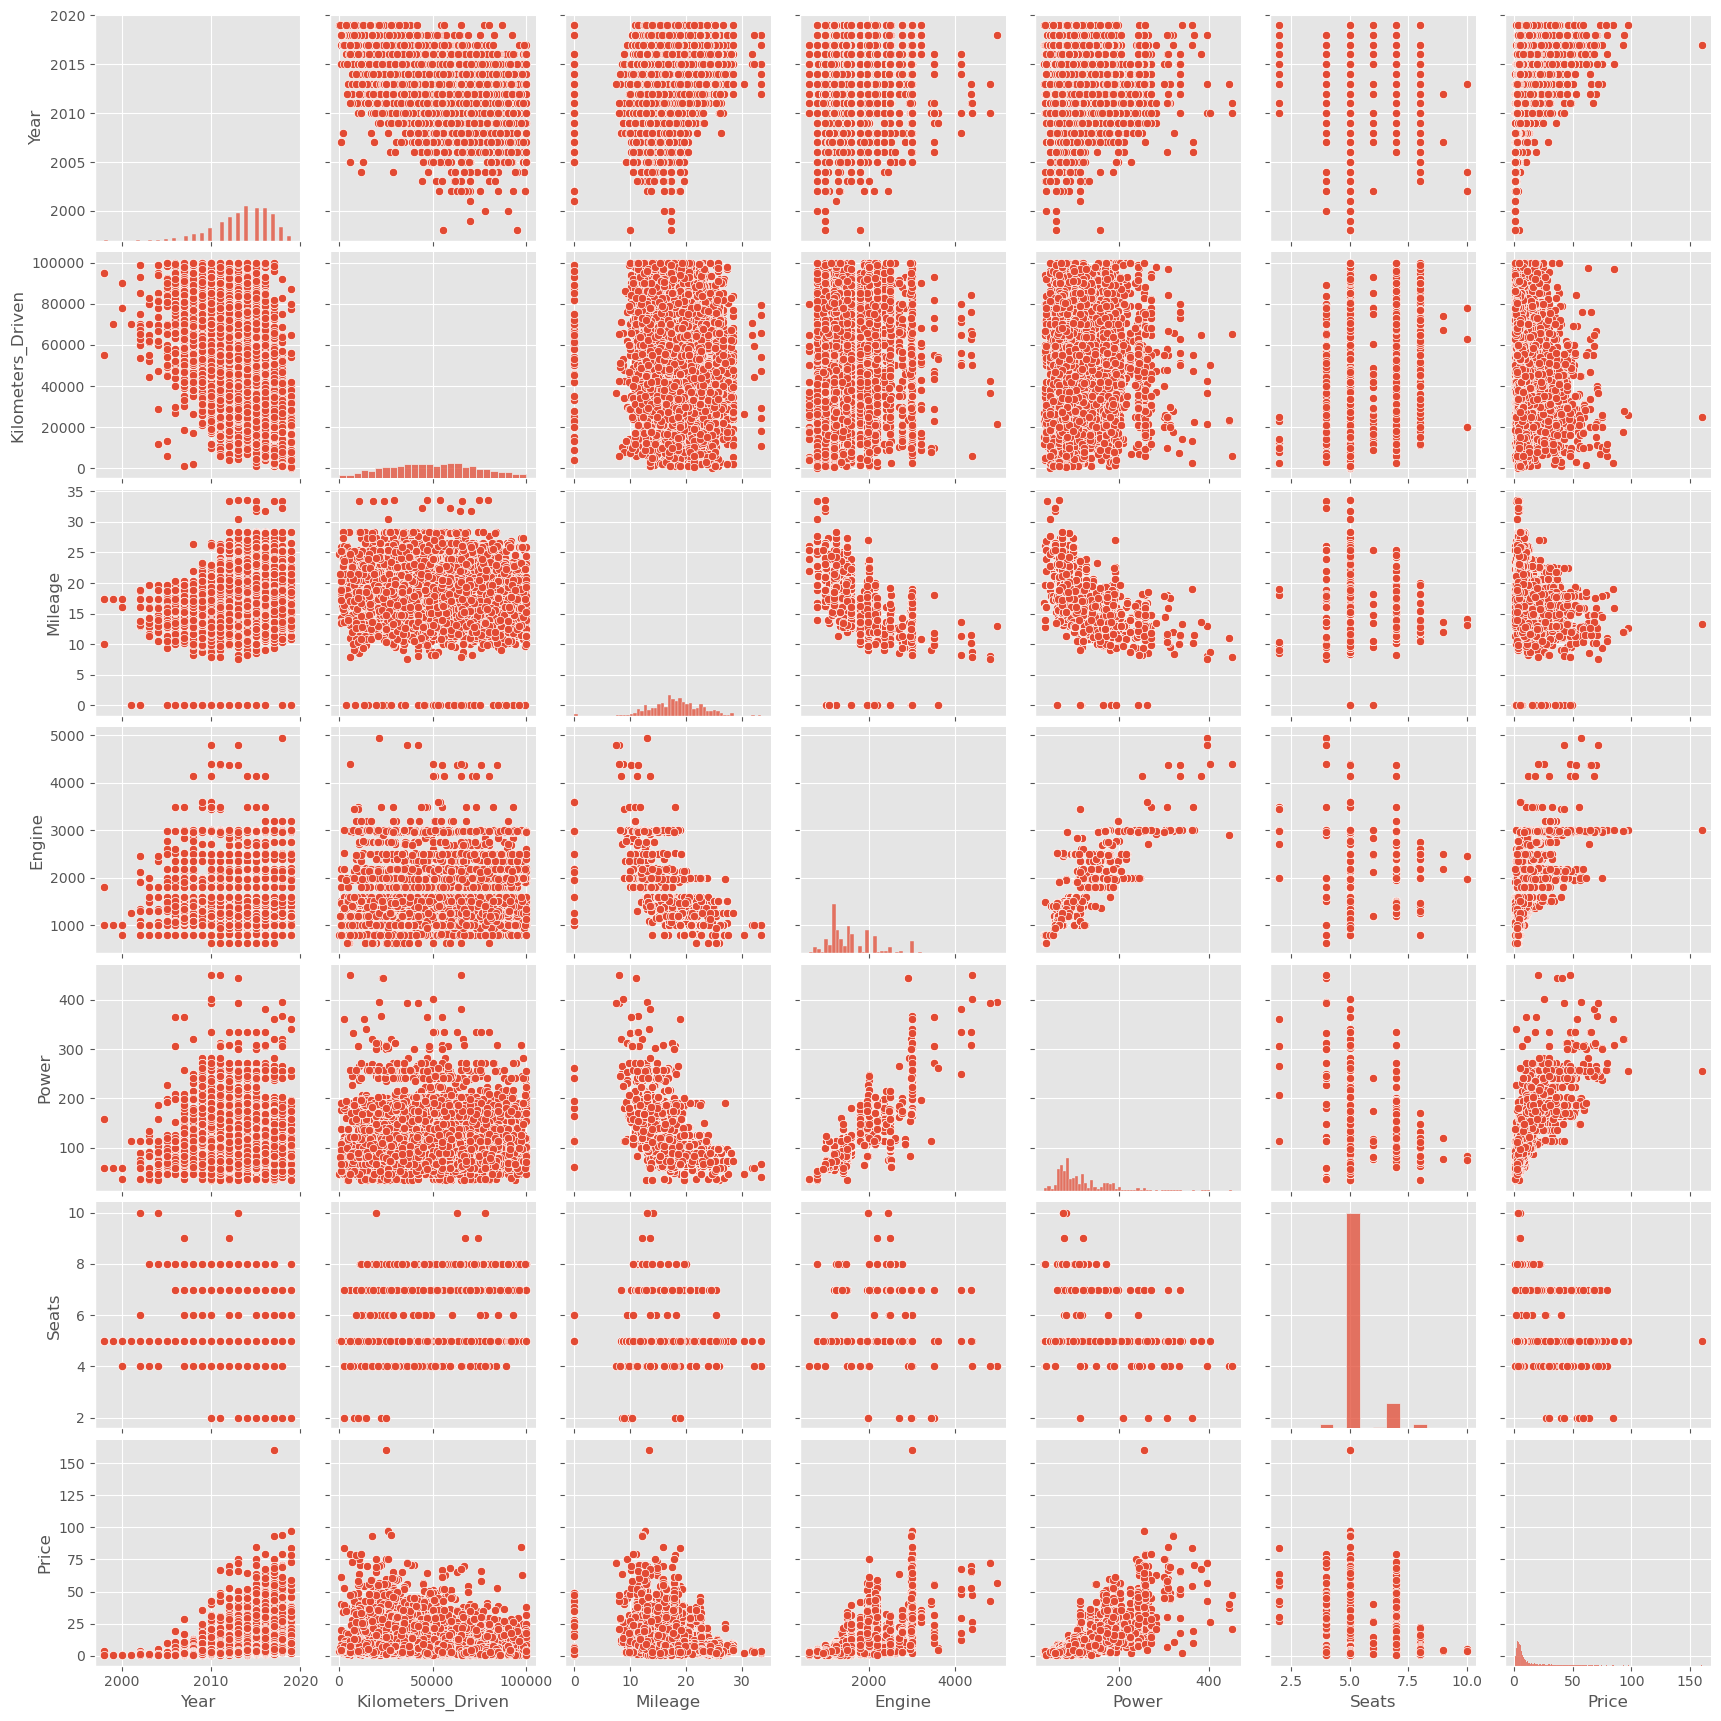

In [82]:
sns.pairplot(data)

### Fuel_Type & Transmission & Engine & Power & Price

In [83]:
data.groupby(['Fuel_Type', 'Transmission'])['Engine'].median().sort_values(ascending = False)

Fuel_Type  Transmission
Diesel     Automatic      2,143
Petrol     Automatic      1,591
Diesel     Manual         1,461
Petrol     Manual         1,197
LPG        Manual         1,061
CNG        Manual           998
Name: Engine, dtype: float64

In [84]:
data.groupby(['Fuel_Type', 'Transmission'])['Power'].median().sort_values(ascending = False)

Fuel_Type  Transmission
Diesel     Automatic      177
Petrol     Automatic      117
Diesel     Manual          90
Petrol     Manual          82
CNG        Manual          58
LPG        Manual          58
Name: Power, dtype: float64

In [85]:
data.groupby(['Fuel_Type', 'Transmission'])['Price'].median().sort_values(ascending = False)

Fuel_Type  Transmission
Diesel     Automatic      22
Petrol     Automatic       7
Diesel     Manual          6
Petrol     Manual          4
CNG        Manual          3
LPG        Manual          3
Name: Price, dtype: float64

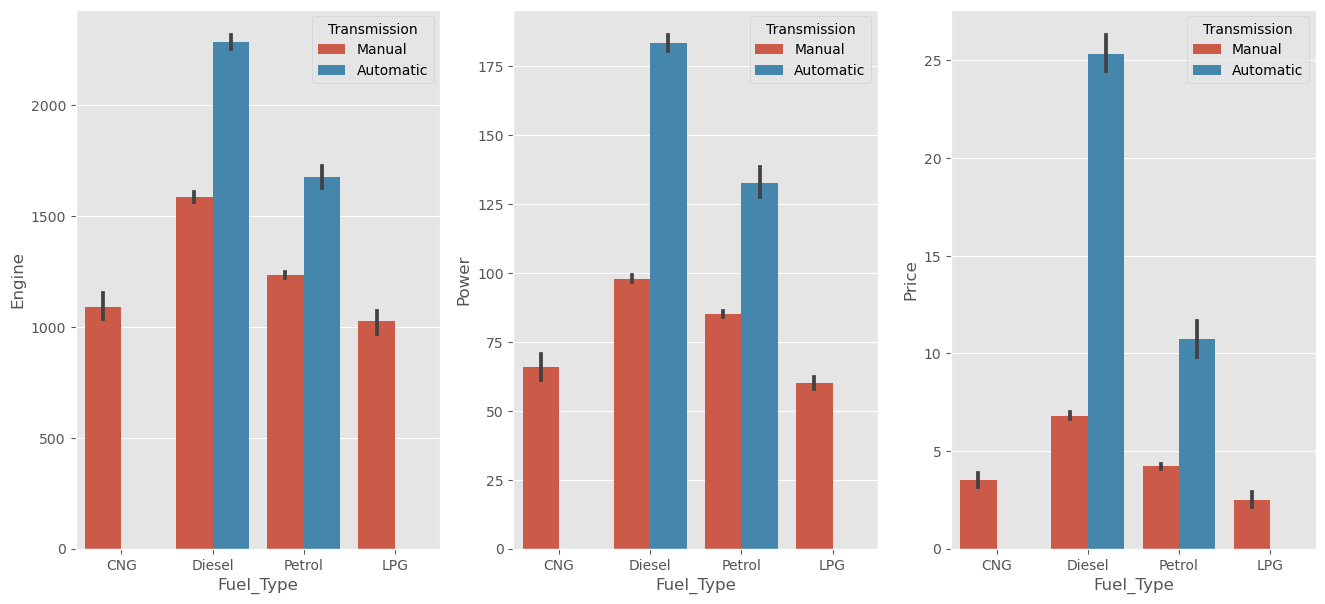

In [86]:
fig, ax = plt.subplots(1, 3, figsize = (16, 7))
sns.barplot(data = data, x = 'Fuel_Type', y = 'Engine', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Fuel_Type', y = 'Power', hue = 'Transmission', ax = ax[1])
sns.barplot(data = data, x = 'Fuel_Type', y = 'Price', hue = 'Transmission', ax = ax[2])
plt.show()

#### Note:
**The cars that use fuel-type diesel and have a transmission automatic have a higher engine equal to 2143CC,  higher power equal to 174bhp, and the price of these cars is very high.**

### Owner_Type & Transmission  & Fuel_Type & Price

In [87]:
data.groupby(['Owner_Type', 'Transmission'])['Price'].median().sort_values(ascending = False)

Owner_Type      Transmission
First           Automatic      17
Second          Automatic      12
Fourth & Above  Automatic       6
First           Manual          5
Third           Automatic       4
Second          Manual          3
Fourth & Above  Manual          3
Third           Manual          2
Name: Price, dtype: float64

In [88]:
data.groupby(['Owner_Type', 'Fuel_Type'])['Price'].median().sort_values(ascending = False)

Owner_Type      Fuel_Type
First           Diesel      8
Second          Diesel      8
First           Petrol      4
Third           Diesel      4
First           CNG         4
Fourth & Above  Petrol      3
Second          Petrol      3
                CNG         3
First           LPG         3
Fourth & Above  Diesel      3
Second          LPG         2
Third           Petrol      2
                CNG         1
Name: Price, dtype: float64

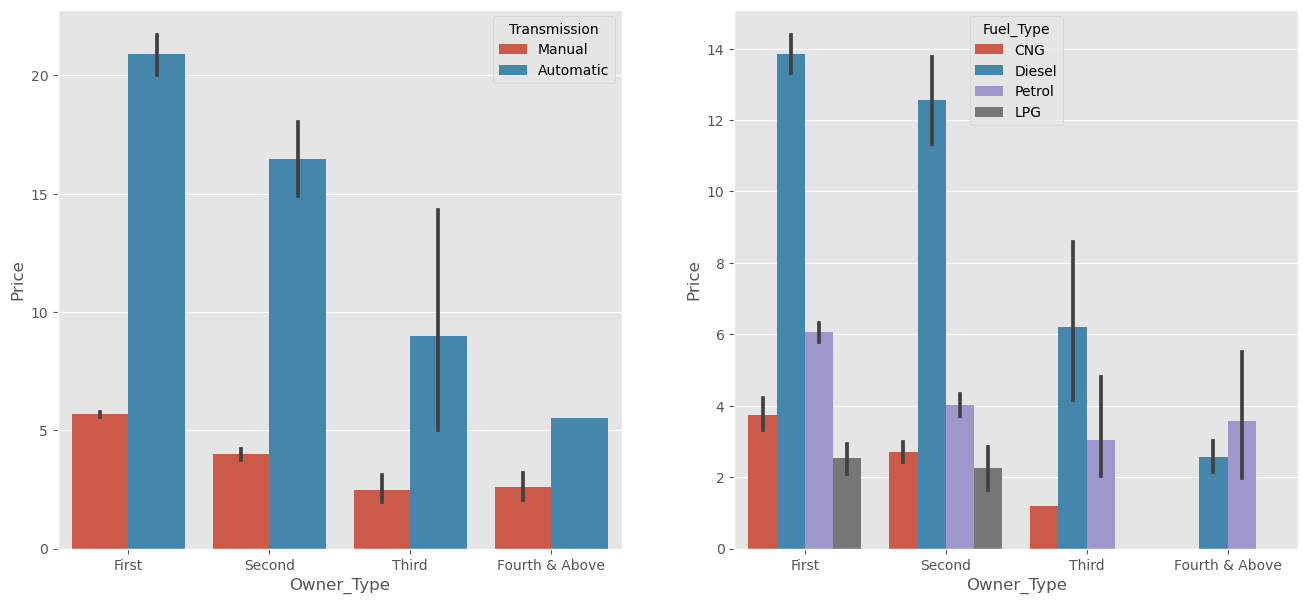

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (16, 7))
sns.barplot(data = data, x = 'Owner_Type', y = 'Price', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Owner_Type', y = 'Price', hue = 'Fuel_Type', ax = ax[1])
plt.show()

#### Note:
**The cars that use fuel-type diesel, and had only one owner, and have a transmission automatic the price of these cars is very high, compared to the cars that had multiple owners and have a transmission man manual and use different fuel-type.**

### Location & Transmission & Fuel_Type & Price

In [90]:
data.groupby(['Location', 'Transmission'])['Price'].median().sort_values(ascending = False)

Location    Transmission
Coimbatore  Automatic      25
Bangalore   Automatic      22
Hyderabad   Automatic      19
Kochi       Automatic      18
Ahmedabad   Automatic      16
Delhi       Automatic      16
Chennai     Automatic      14
Jaipur      Automatic      13
Mumbai      Automatic      12
Kolkata     Automatic      11
Pune        Automatic      11
Coimbatore  Manual          6
Kochi       Manual          6
Bangalore   Manual          5
Hyderabad   Manual          5
Ahmedabad   Manual          5
Mumbai      Manual          5
Delhi       Manual          4
Jaipur      Manual          4
Chennai     Manual          4
Pune        Manual          4
Kolkata     Manual          3
Name: Price, dtype: float64

In [91]:
data.groupby(['Location', 'Fuel_Type'])['Price'].median().sort_values(ascending = False)

Location    Fuel_Type
Coimbatore  Diesel      15
Bangalore   Diesel      13
Mumbai      Diesel      10
Kochi       Diesel       9
Delhi       Diesel       8
Hyderabad   Diesel       8
Ahmedabad   Diesel       8
Pune        Diesel       7
Chennai     Diesel       7
Coimbatore  Petrol       6
Jaipur      Diesel       6
Kochi       Petrol       6
Kolkata     Diesel       5
Bangalore   Petrol       5
Mumbai      Petrol       5
Delhi       Petrol       4
Kochi       CNG          4
Chennai     CNG          4
Ahmedabad   Petrol       4
Chennai     Petrol       4
Hyderabad   Petrol       3
Mumbai      CNG          3
Ahmedabad   CNG          3
Pune        Petrol       3
Jaipur      Petrol       3
Pune        CNG          3
Kolkata     Petrol       3
Hyderabad   LPG          3
Delhi       CNG          3
Jaipur      LPG          3
Hyderabad   CNG          2
Pune        LPG          2
Mumbai      LPG          1
Name: Price, dtype: float64

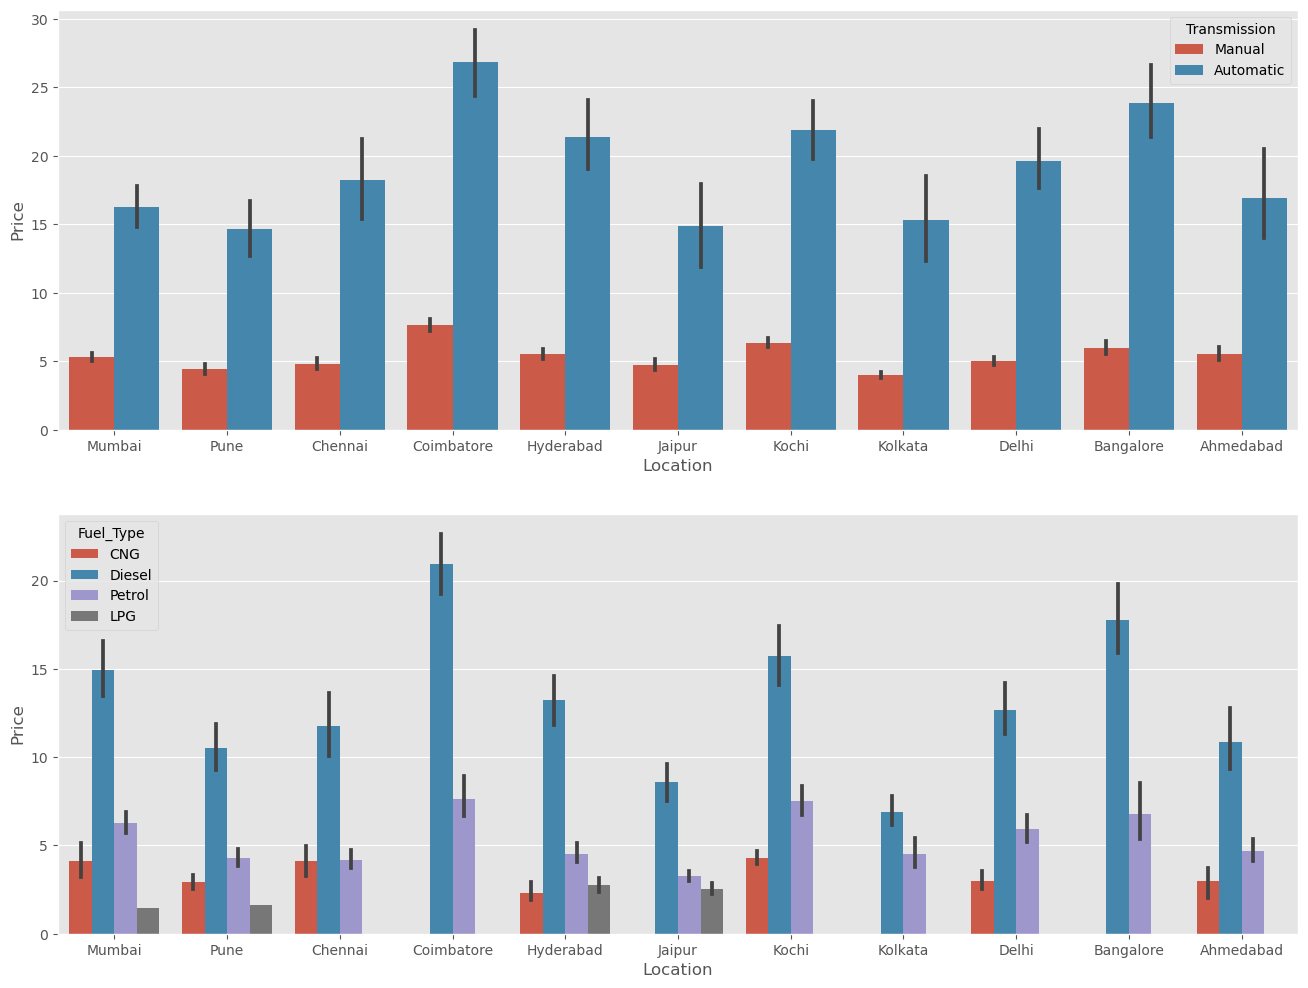

In [92]:
fig, ax = plt.subplots(2, 1, figsize = (16, 12))
sns.barplot(data = data, x = 'Location', y = 'Price', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Location', y = 'Price', hue = 'Fuel_Type', ax = ax[1])
plt.show()

#### Note:
**The cars in Coimbatore that use fuel-type diesel and have a transmission automatic have higher prices than cars in other regions.**

# Data Pre-processing

## 1. Splitting the Features

In [93]:
# Splitting the data to Numerical Features and Categorical Features
num_features = list(data.select_dtypes('number'))
num_features.remove('Price')

nom_features = list(data.select_dtypes('object'))
nom_features.remove('Owner_Type')

ord_features = ['Owner_Type']

print(f'The Numerical Features: {num_features}')
print(f'The Nominal Features: {nom_features}')
print(f'The Ordinal Features: {ord_features}')

The Numerical Features: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
The Nominal Features: ['Location', 'Fuel_Type', 'Transmission', 'Brand']
The Ordinal Features: ['Owner_Type']


## 2. Splitting the data to training data and testing data

In [94]:
# taking a copy from data
data_modeling = data.copy()

X = data_modeling.drop('Price', axis = 1)
y = data_modeling['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)

In [95]:
X_train[X_train['Brand'] == 'Isuzu']

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats


In [96]:
X_test[X_test['Brand'] == 'Isuzu']

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
2900,Jaipur,Diesel,Automatic,First,Isuzu,2017,34429,14,"2,999",175,7


In [97]:
X_test = X_test.drop(2900)
y_test = y_test.drop(2900)

**The "Isuzu" brand is not in X_train, so it hasn't been encoded because it is not recognized in the transformation pipeline training, so we dropped it from X_test and we dropped its target from y_test.**

## 3. Transformation Pipeline

In [98]:
# numerical pipeline
num_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'median'),
                             StandardScaler()
                            )
# nominal pipeline
nom_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder()
                            )

# ordinal pipeline
ord_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OrdinalEncoder()
                            )
# Combine the numerical pipeline, nominal pipeline, and ordinal pipeline in a one Pipeline 
preprocessor = ColumnTransformer([
                                  ('numerical', num_pipeline, num_features), 
                                  ('nominal', nom_pipeline, nom_features),
                                  ('ordinal', ord_pipeline, ord_features)
                                ])
    
# Fitting the training data               
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Year', 'Kilometers_Driven', 'Mileage',
                                  'Engine', 'Power', 'Seats']),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Location', 'Fuel_Type', 'Transmission',
                                  'Brand']),
                                ('ordinal',
                     

## 4. Data Transformation

In [99]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

# Modeling

## 1. Linear Regression

In [100]:
# Linear Regression Model
lin_reg = LinearRegression()

# Model Fitting
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [101]:
# Training the Linear Regression Model 

# Predictions of X_train
lr_pred_tarin = lin_reg.predict(X_train_transformed)

print("Training Accuracy of Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lr_pred_tarin)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lr_pred_tarin))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, lr_pred_tarin) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Mean Absolute Error      :  2.894603048380952
Root Mean Squared  Error :  5.277535279327741
R-Squered Training       :  78.5 %


In [102]:
# Cross Validation for Linear Regression Model
lin_reg_scores = cross_val_score(lin_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Linear Regression Accuracy          :  {lin_reg_scores}')
print(f'Linear Regression Standard Deviation:  {round(lin_reg_scores.std(), 2)}')
print(f'Linear Regression Accuracy Mean     :  {round(lin_reg_scores.mean() * 100, 2)} %')

Linear Regression Accuracy          :  [0.80000301 0.72031667 0.81531017 0.75654049 0.78592077 0.76817178
 0.80571173 0.75969846]
Linear Regression Standard Deviation:  0.03
Linear Regression Accuracy Mean     :  77.65 %


In [103]:
#Testing the Linear Regression Model 

# Predictions of X_test
lr_pred_test = lin_reg.predict(X_test_transformed)

print("Tasting Accuracy for Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lr_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lr_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lr_pred_test) * 100, 2)} %')

Tasting Accuracy for Linear Regression: 

Mean Absolute Error      :  2.793245935659037
Root Mean Squared  Error :  4.523091634336089
R-Squered Testing        :  82.49 %


## 2. Polynomial Regression

In [104]:
# Linear Regression Model with Polynomial Features
poly_reg = Pipeline([
    
                      ('poly_features', PolynomialFeatures(degree = 2)),
                      ('lin_reg', LinearRegression())
    
                    ])

# Model Fitting
poly_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [105]:
# Training the Polynomial Regression Model 

# Predictions of X_train
poly_pred_train = poly_reg.predict(X_train_transformed)

print("Training Accuracy for Polynomial Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, poly_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, poly_pred_train))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, poly_pred_train) * 100, 2)} %')

Training Accuracy for Polynomial Regression: 

Mean Absolute Error      :  1.410732630230955
Root Mean Squared  Error :  2.547077144824797
R-Squered Training       :  94.99 %


In [106]:
# Cross Validation for Polynomial Regression Model
poly_reg_scores = cross_val_score(poly_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Polynomial Regression Accuracy          :  {poly_reg_scores}')
print(f'Polynomial Regression Standard Deviation:  {round(poly_reg_scores.std(), 2)}')
print(f'Polynomial Regression Accuracy Mean     :  {round(poly_reg_scores.mean() * 100, 2)} %')

Polynomial Regression Accuracy          :  [0.82768151 0.88097298 0.81259334 0.6242656  0.81173699 0.93327529
 0.89949589 0.82418625]
Polynomial Regression Standard Deviation:  0.09
Polynomial Regression Accuracy Mean     :  82.68 %


In [107]:
#Testing the Polynomial Regression Model 

# Predictions of X_test
poly_pred_test = poly_reg.predict(X_test_transformed)

print("Tasting Accuracy for Polynomial Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, poly_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, poly_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, poly_pred_test) * 100, 2)} %')

Tasting Accuracy for Polynomial Regression: 

Mean Absolute Error      :  1.746405424091943
Root Mean Squared  Error :  3.175437218037221
R-Squered Testing        :  91.37 %


## 3. Ridge Regression

In [108]:
# Ridge Regression Model with Polynomial Features
ridge_reg = Pipeline([
    
                            ('poly_features', PolynomialFeatures(degree = 2)),
                            ('ridge', Ridge(alpha = 0.5))
                        ])

# Model Fitting
ridge_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.5))])

In [109]:
# Training the Ridge Regression Model 

# Predictions of X_train
ridge_pred_train = ridge_reg.predict(X_train_transformed)

print("Training Accuracy for Ridge Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, ridge_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, ridge_pred_train))}')
print(f'R-Squered Training          :  {round(r2_score(y_train, ridge_pred_train) * 100, 2)} %')

Training Accuracy for Ridge Regression: 

Mean Absolute Error      :  1.435845455029516
Root Mean Squared  Error :  2.6005425192288754
R-Squered Training          :  94.78 %


In [110]:
# Cross Validation for Ridge Regression Model
ridge_reg_scores = cross_val_score(ridge_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Ridge Regression Accuracy          :  {ridge_reg_scores}')
print(f'Ridge Regression Standard Deviation:  {round(ridge_reg_scores.std(), 2)}')
print(f'Ridge Regression Accuracy Mean     :  {round(ridge_reg_scores.mean() * 100, 2)} %')

Ridge Regression Accuracy          :  [0.87984338 0.88017625 0.84919228 0.81598192 0.88191244 0.9348668
 0.92094424 0.93032365]
Ridge Regression Standard Deviation:  0.04
Ridge Regression Accuracy Mean     :  88.67 %


In [111]:
#Testing the Ridge Regression Model 

# Predictions of X_test
ridge_pred_test = ridge_reg.predict(X_test_transformed)

print("Tasting Accuracy for Ridge Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, ridge_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, ridge_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, ridge_pred_test) * 100, 2)} %')

Tasting Accuracy for Ridge Regression: 

Mean Absolute Error      :  1.6487788032088908
Root Mean Squared  Error :  2.9069901297653535
R-Squered Testing        :  92.77 %


## 4. RidgeCV Regression

In [112]:
# RidgeCV Regression Model with Polynomial Features
ridgecv_reg = Pipeline([
    
                              ('poly_features', PolynomialFeatures(degree = 2)),
                              ('ridgecv', RidgeCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))
    
                            ])

# Model Fitting
ridgecv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1 , 0.25, 0.5 , 0.75, 1.  , 2.  , 5.  ])))])

In [113]:
# Training the RidgeCV Regression Model

# Predictions of X_train
ridgecv_pred_train = ridgecv_reg.predict(X_train_transformed)

print("Training Accuracy for RidgeCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, ridgecv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, ridgecv_pred_train))}')
print(f'R-Squered Training          :  {round(r2_score(y_train, ridgecv_pred_train) * 100, 2)} %')

Training Accuracy for RidgeCV Regression: 

Mean Absolute Error      :  1.4384168810644544
Root Mean Squared  Error :  2.70698038918418
R-Squered Training          :  94.34 %


In [114]:
# Cross Validation for RidgeCV Regression Model
ridgecv_reg_scores = cross_val_score(ridgecv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'RidgeCV Regression Accuracy          :  {ridgecv_reg_scores}')
print(f'RidgeCV Regression Standard Deviation:  {round(ridgecv_reg_scores.std(), 2)}')
print(f'RidgeCV Regression Accuracy Mean     :  {round(ridgecv_reg_scores.mean() * 100, 2)} %')

RidgeCV Regression Accuracy          :  [0.89563274 0.88551047 0.8816091  0.83006428 0.90441678 0.93549645
 0.93733537 0.93181638]
RidgeCV Regression Standard Deviation:  0.03
RidgeCV Regression Accuracy Mean     :  90.02 %


In [115]:
#Testing the RidgeCV Regression Model

# Predictions of X_test
ridgecv_pred_test = ridgecv_reg.predict(X_test_transformed)

print("Tasting Accuracy for RidgeCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, ridgecv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, ridgecv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, ridgecv_pred_test) * 100, 2)} %')

Tasting Accuracy for RidgeCV Regression: 

Mean Absolute Error      :  1.578224833464728
Root Mean Squared  Error :  2.771915529490413
R-Squered Testing        :  93.42 %


## 5. Lasso Regression

In [116]:
# Lasso Regression Model with Polynomial Features
lasso_reg = Pipeline([
    
                            ('poly_features', PolynomialFeatures(degree = 2)),
                            ('lasso', Lasso(alpha = 0.5))
    
                        ])

# Model Fitting
lasso_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.5))])

In [117]:
# Training the Lasso Regression Model

# Predictions of X_train
lasso_pred_train = lasso_reg.predict(X_train_transformed)

print("Training Accuracy for Lasso Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lasso_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lasso_pred_train))}')
print(f'R Squared Error          :  {round(r2_score(y_train, lasso_pred_train) * 100, 2)} %')

Training Accuracy for Lasso Regression: 

Mean Absolute Error      :  2.651730600290781
Root Mean Squared  Error :  4.957707139987711
R Squared Error          :  81.02 %


In [118]:
# Cross Validation for Lasso Regression Model
lasso_reg_scores = cross_val_score(ridgecv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Lasso Regression Accuracy          :  {lasso_reg_scores}')
print(f'Lasso Regression Standard Deviation:  {round(lasso_reg_scores.std(), 2)}')
print(f'Lasso Regression Accuracy Mean     :  {round(lasso_reg_scores.mean() * 100, 2)} %')

Lasso Regression Accuracy          :  [0.89563274 0.88551047 0.8816091  0.83006428 0.90441678 0.93549645
 0.93733537 0.93181638]
Lasso Regression Standard Deviation:  0.03
Lasso Regression Accuracy Mean     :  90.02 %


In [119]:
#Testing the Lasso Regression Model

# Predictions of X_test
lasso_pred_test = lasso_reg.predict(X_test_transformed)

print("Tasting Accuracy for Lasso Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lasso_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lasso_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lasso_pred_test) * 100, 2)} %')

Tasting Accuracy for Lasso Regression: 

Mean Absolute Error      :  2.46306046030692
Root Mean Squared  Error :  3.9933877342196067
R-Squered Testing        :  86.35 %


## 6. LassoCV Regression

In [120]:
# LassoCV Regression Model with Polynomial Features
lassocv_reg = Pipeline([
    
                            ('poly_features', PolynomialFeatures(degree = 2)),
                            ('lassocv', LassoCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))
                          
                            ])

# Model Fitting
lassocv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lassocv',
                 LassoCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))])

In [121]:
# Training the LassoCV Regression Model

# Predictions of X_train
lassocv_pred_train = lassocv_reg.predict(X_train_transformed)

print("Training Accuracy for LassoCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lassocv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lassocv_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, lassocv_pred_train) * 100, 2)} %')

Training Accuracy for LassoCV Regression: 

Mean Absolute Error      :  2.1664930807363447
Root Mean Squared  Error :  4.124840010074153
R-Squered Train          :  86.86 %


In [122]:
# Cross Validation for LassoCV Regression Model
lassocv_reg_scores = cross_val_score(lassocv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'LassoCV Regression Accuracy          :  {lassocv_reg_scores}')
print(f'LassoCV Regression Standard Deviation:  {round(lassocv_reg_scores.std(), 2)}')
print(f'LassoCV Regression Accuracy Mean     :  {round(lassocv_reg_scores.mean() * 100, 2)} %')

LassoCV Regression Accuracy          :  [0.86550883 0.82291827 0.84842405 0.817533   0.8766946  0.87808687
 0.88576994 0.8657721 ]
LassoCV Regression Standard Deviation:  0.02
LassoCV Regression Accuracy Mean     :  85.76 %


In [123]:
#Testing the LassoCV Regression Model

# Predictions of X_test
lassocv_pred_test = lassocv_reg.predict(X_test_transformed)

print("Tasting Accuracy for LassoCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lassocv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lassocv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lassocv_pred_test) * 100, 2)} %')

Tasting Accuracy for LassoCV Regression: 

Mean Absolute Error      :  2.025751187713899
Root Mean Squared  Error :  3.392946836345694
R-Squered Testing        :  90.15 %


## 7. ElasticNet Regression

In [124]:
# ElasticNet Regression Model with Polynomial Features
elasticnet_reg = Pipeline([
    
                                ('poly_features', PolynomialFeatures(degree = 2)),
                                ('elasticnt', ElasticNet(alpha = 0.5))
    
                              ])

# Model Fitting
elasticnet_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('elasticnt', ElasticNet(alpha=0.5))])

In [125]:
# Training the ElasticNet Regression Model

# Predictions of X_train
elasticnet_pred_train = elasticnet_reg.predict(X_train_transformed)

print("Training Accuracy for ElasticNet Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, elasticnet_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, elasticnet_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, elasticnet_pred_train) * 100, 2)} %')

Training Accuracy for ElasticNet Regression: 

Mean Absolute Error      :  2.463253358275643
Root Mean Squared  Error :  4.836062696217692
R-Squered Train          :  81.94 %


In [126]:
# Cross Validation for ElasticNet Regression Model
elasticnet_reg_scores = cross_val_score(elasticnet_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'ElasticNet Regression Accuracy          :  {elasticnet_reg_scores}')
print(f'ElasticNet Regression Standard Deviation:  {round(elasticnet_reg_scores.std(), 2)}')
print(f'ElasticNet Regression Accuracy Mean     :  {round(elasticnet_reg_scores.mean() * 100, 2)} %')

ElasticNet Regression Accuracy          :  [0.82122571 0.75487752 0.83007909 0.80184637 0.82235076 0.82832288
 0.83722197 0.81917549]
ElasticNet Regression Standard Deviation:  0.02
ElasticNet Regression Accuracy Mean     :  81.44 %


In [127]:
#Testing the ElasticNet Regression Model

# Predictions of X_test
elasticnet_pred_test = elasticnet_reg.predict(X_test_transformed)

print("Tasting Accuracy for LassoCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, elasticnet_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, elasticnet_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, elasticnet_pred_test) * 100, 2)} %')

Tasting Accuracy for LassoCV Regression: 

Mean Absolute Error      :  2.365304985299752
Root Mean Squared  Error :  3.9698230414745828
R-Squered Testing        :  86.51 %


## 8. ElasticNetCV Regression

In [128]:
# ElasticNetCV Regression Model with Polynomial Features
elasticnetcv_reg = Pipeline([
    
                                  ('poly_features', PolynomialFeatures(degree = 2)),
                                  ('elasticntcv', ElasticNetCV())
                               
                                ])
 
# Model Fitting
elasticnetcv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('elasticntcv', ElasticNetCV())])

In [129]:
# Training the ElasticNetCV Regression Model

# Predictions of X_train
elasticnetcv_pred_train = elasticnetcv_reg.predict(X_train_transformed)

print("Training Accuracy for ElasticNetCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, elasticnetcv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, elasticnetcv_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, elasticnetcv_pred_train) * 100, 2)} %')

Training Accuracy for ElasticNetCV Regression: 

Mean Absolute Error      :  1.7579669178163848
Root Mean Squared  Error :  3.47913101337079
R-Squered Train          :  90.65 %


In [130]:
# Cross Validation for ElasticNet Regression Model
elasticnetcv_reg_scores = cross_val_score(elasticnetcv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'ElasticNetCV Regression Accuracy          :  {elasticnetcv_reg_scores}')
print(f'ElasticNetCV Regression Standard Deviation:  {round(elasticnetcv_reg_scores.std(), 2)}')
print(f'ElasticNetCV Regression Accuracy Mean     :  {round(elasticnetcv_reg_scores.mean() * 100, 2)} %')

ElasticNetCV Regression Accuracy          :  [0.89217824 0.85888942 0.87269221 0.84535543 0.90711472 0.90923699
 0.92205484 0.90392394]
ElasticNetCV Regression Standard Deviation:  0.03
ElasticNetCV Regression Accuracy Mean     :  88.89 %


In [131]:
#Testing the ElasticNetCV Regression Model

# Predictions of X_test
elasticnetcv_pred_test = elasticnetcv_reg.predict(X_test_transformed)

print("Tasting Accuracy for ElasticNetCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, elasticnetcv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, elasticnetcv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, elasticnetcv_pred_test) * 100, 2)} %')

Tasting Accuracy for ElasticNetCV Regression: 

Mean Absolute Error      :  1.71664730016303
Root Mean Squared  Error :  3.001014660117827
R-Squered Testing        :  92.29 %


# Summarize for Models

In [132]:
# Linear Regression vs. Decision Tree Training and Testing Accuracy
Models_Summarization = pd.DataFrame(
                {
                  
                    'Training Accuracy': [round(r2_score(y_train, lr_pred_tarin) * 100, 2), 
                                          round(r2_score(y_train, poly_pred_train) * 100, 2), 
                                          round(r2_score(y_train, ridge_pred_train) * 100, 2), 
                                          round(r2_score(y_train, ridgecv_pred_train) * 100, 2), 
                                          round(r2_score(y_train, lasso_pred_train) * 100, 2), 
                                          round(r2_score(y_train, lassocv_pred_train) * 100, 2), 
                                          round(r2_score(y_train, elasticnet_pred_train) * 100, 2),
                                          round(r2_score(y_train, elasticnetcv_pred_train) * 100, 2)], 
               
                    'Teasting Accuracy': [round(r2_score(y_test, lr_pred_test) * 100, 2), 
                                         round(r2_score(y_test, poly_pred_test) * 100, 2), 
                                         round(r2_score(y_test, ridge_pred_test) * 100, 2), 
                                         round(r2_score(y_test, ridgecv_pred_test) * 100, 2), 
                                         round(r2_score(y_test, lasso_pred_test) * 100, 2), 
                                         round(r2_score(y_test, lassocv_pred_test) * 100, 2), 
                                         round(r2_score(y_test, elasticnet_pred_test) * 100, 2), 
                                         round(r2_score(y_test, elasticnetcv_pred_test) * 100, 2)], 
              
                }, 
              
                index = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'RidgeCV Regression', 
                         'Lasso Regression', 'LassoCV Regression', 'ElasticNet Regression', 'ElasticNetCV Regression']
            )

In [133]:
Models_Summarization

,Training Accuracy,Teasting Accuracy
Linear Regression,78,82
Polynomial Regression,95,91
Ridge Regression,95,93
RidgeCV Regression,94,93
Lasso Regression,81,86
LassoCV Regression,87,90
ElasticNet Regression,82,87
ElasticNetCV Regression,91,92


**The best regularization method That fits data well is RidgeCV**

# Save Model

In [134]:
# the library of save models
import joblib

In [135]:
# Save RidgeCV Regression Model
joblib.dump(ridgecv_reg, 'RidgeCV_Model.pkl')

['RidgeCV_Model.pkl']

In [136]:
# Save Transformation Pipeline
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']